In [ ]:
from algorithm.utils.data.tf.dataimage import DataImage
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.get_logger().setLevel('WARNING')
import keras
%load_ext tensorboard

In [2]:
normalize = True
mean = 'auto' # 'auto' -> mean_value = [float(1/255), float(1/255), float(1/255)]
mean_value = [float(1/255), float(1/255), float(1/255)]

In [3]:
dataset = DataImage(data_path="..\\Input\\dataset", split=0.2, resize=True, height='auto', width='auto', normalize=normalize, mean=mean, name="Electronic components dataset", batch_size=16)

In [4]:
dataset

Electronic components dataset
	Number of points: 2884
	Root location: ..\Input\dataset
	Split: 0.2
	Transform used:	Resize(size=(128, 128)
	Normalize(mean=[0.00392156862745098, 0.00392156862745098, 0.00392156862745098], std=None)


In [5]:
validset = dataset.get_set(split="validation")

In [6]:
# get some random training images
dataiter = iter(validset)
images, labels = next(dataiter)

In [8]:
images

{'data': <tf.Tensor: shape=(16, 128, 128, 3), dtype=float32, numpy=
 array([[[[0.13528647, 0.2803845 , 0.20979628],
          [0.12892158, 0.27401963, 0.20343138],
          [0.12522213, 0.27032018, 0.19973193],
          ...,
          [0.10953585, 0.2546339 , 0.18404566],
          [0.110072  , 0.25517005, 0.18458182],
          [0.1101103 , 0.25520834, 0.18462011]],
 
         [[0.12941177, 0.27450982, 0.20392159],
          [0.12892158, 0.27401963, 0.20343138],
          [0.12205883, 0.26715687, 0.19656864],
          ...,
          [0.09852942, 0.24362746, 0.17303923],
          [0.10539217, 0.25049022, 0.17990197],
          [0.10775889, 0.25285694, 0.1822687 ]],
 
         [[0.1254902 , 0.27058825, 0.20000002],
          [0.1254902 , 0.27058825, 0.20000002],
          [0.1254902 , 0.27058825, 0.20000002],
          ...,
          [0.10196079, 0.24705884, 0.1764706 ],
          [0.10539217, 0.25049022, 0.17990197],
          [0.11225491, 0.25735295, 0.18676472]],
 
         ...,


In [9]:
labels

<tf.Tensor: shape=(16,), dtype=string, numpy=
array([b'Not mounted', b'Resistor', b'Rectangular pin', b'Not mounted',
       b'Rectangular pin', b'Resistor', b'SOT', b'Tantalum capacitor',
       b'Resistor', b'Resistor', b'Resistor', b'LED', b'Resistor',
       b'Resistor', b'Rectangular pin', b'Resistor'], dtype=object)>

In [10]:
class_names = dataset.labels

In [11]:
class_names

['Ceramic capacitor',
 'Connector',
 'Diode',
 'Dip Switch',
 'Fuse',
 'IC',
 'Inductor',
 'Jumper',
 'Jumper cut',
 'LED',
 'Minimelf',
 'Not mounted',
 'Optoisolator',
 'Oscillator',
 'Pushbutton',
 'Rectangular pin',
 'Relais',
 'Resistor',
 'Resistor Network',
 'SOT',
 'TO252',
 'Tantalum capacitor']

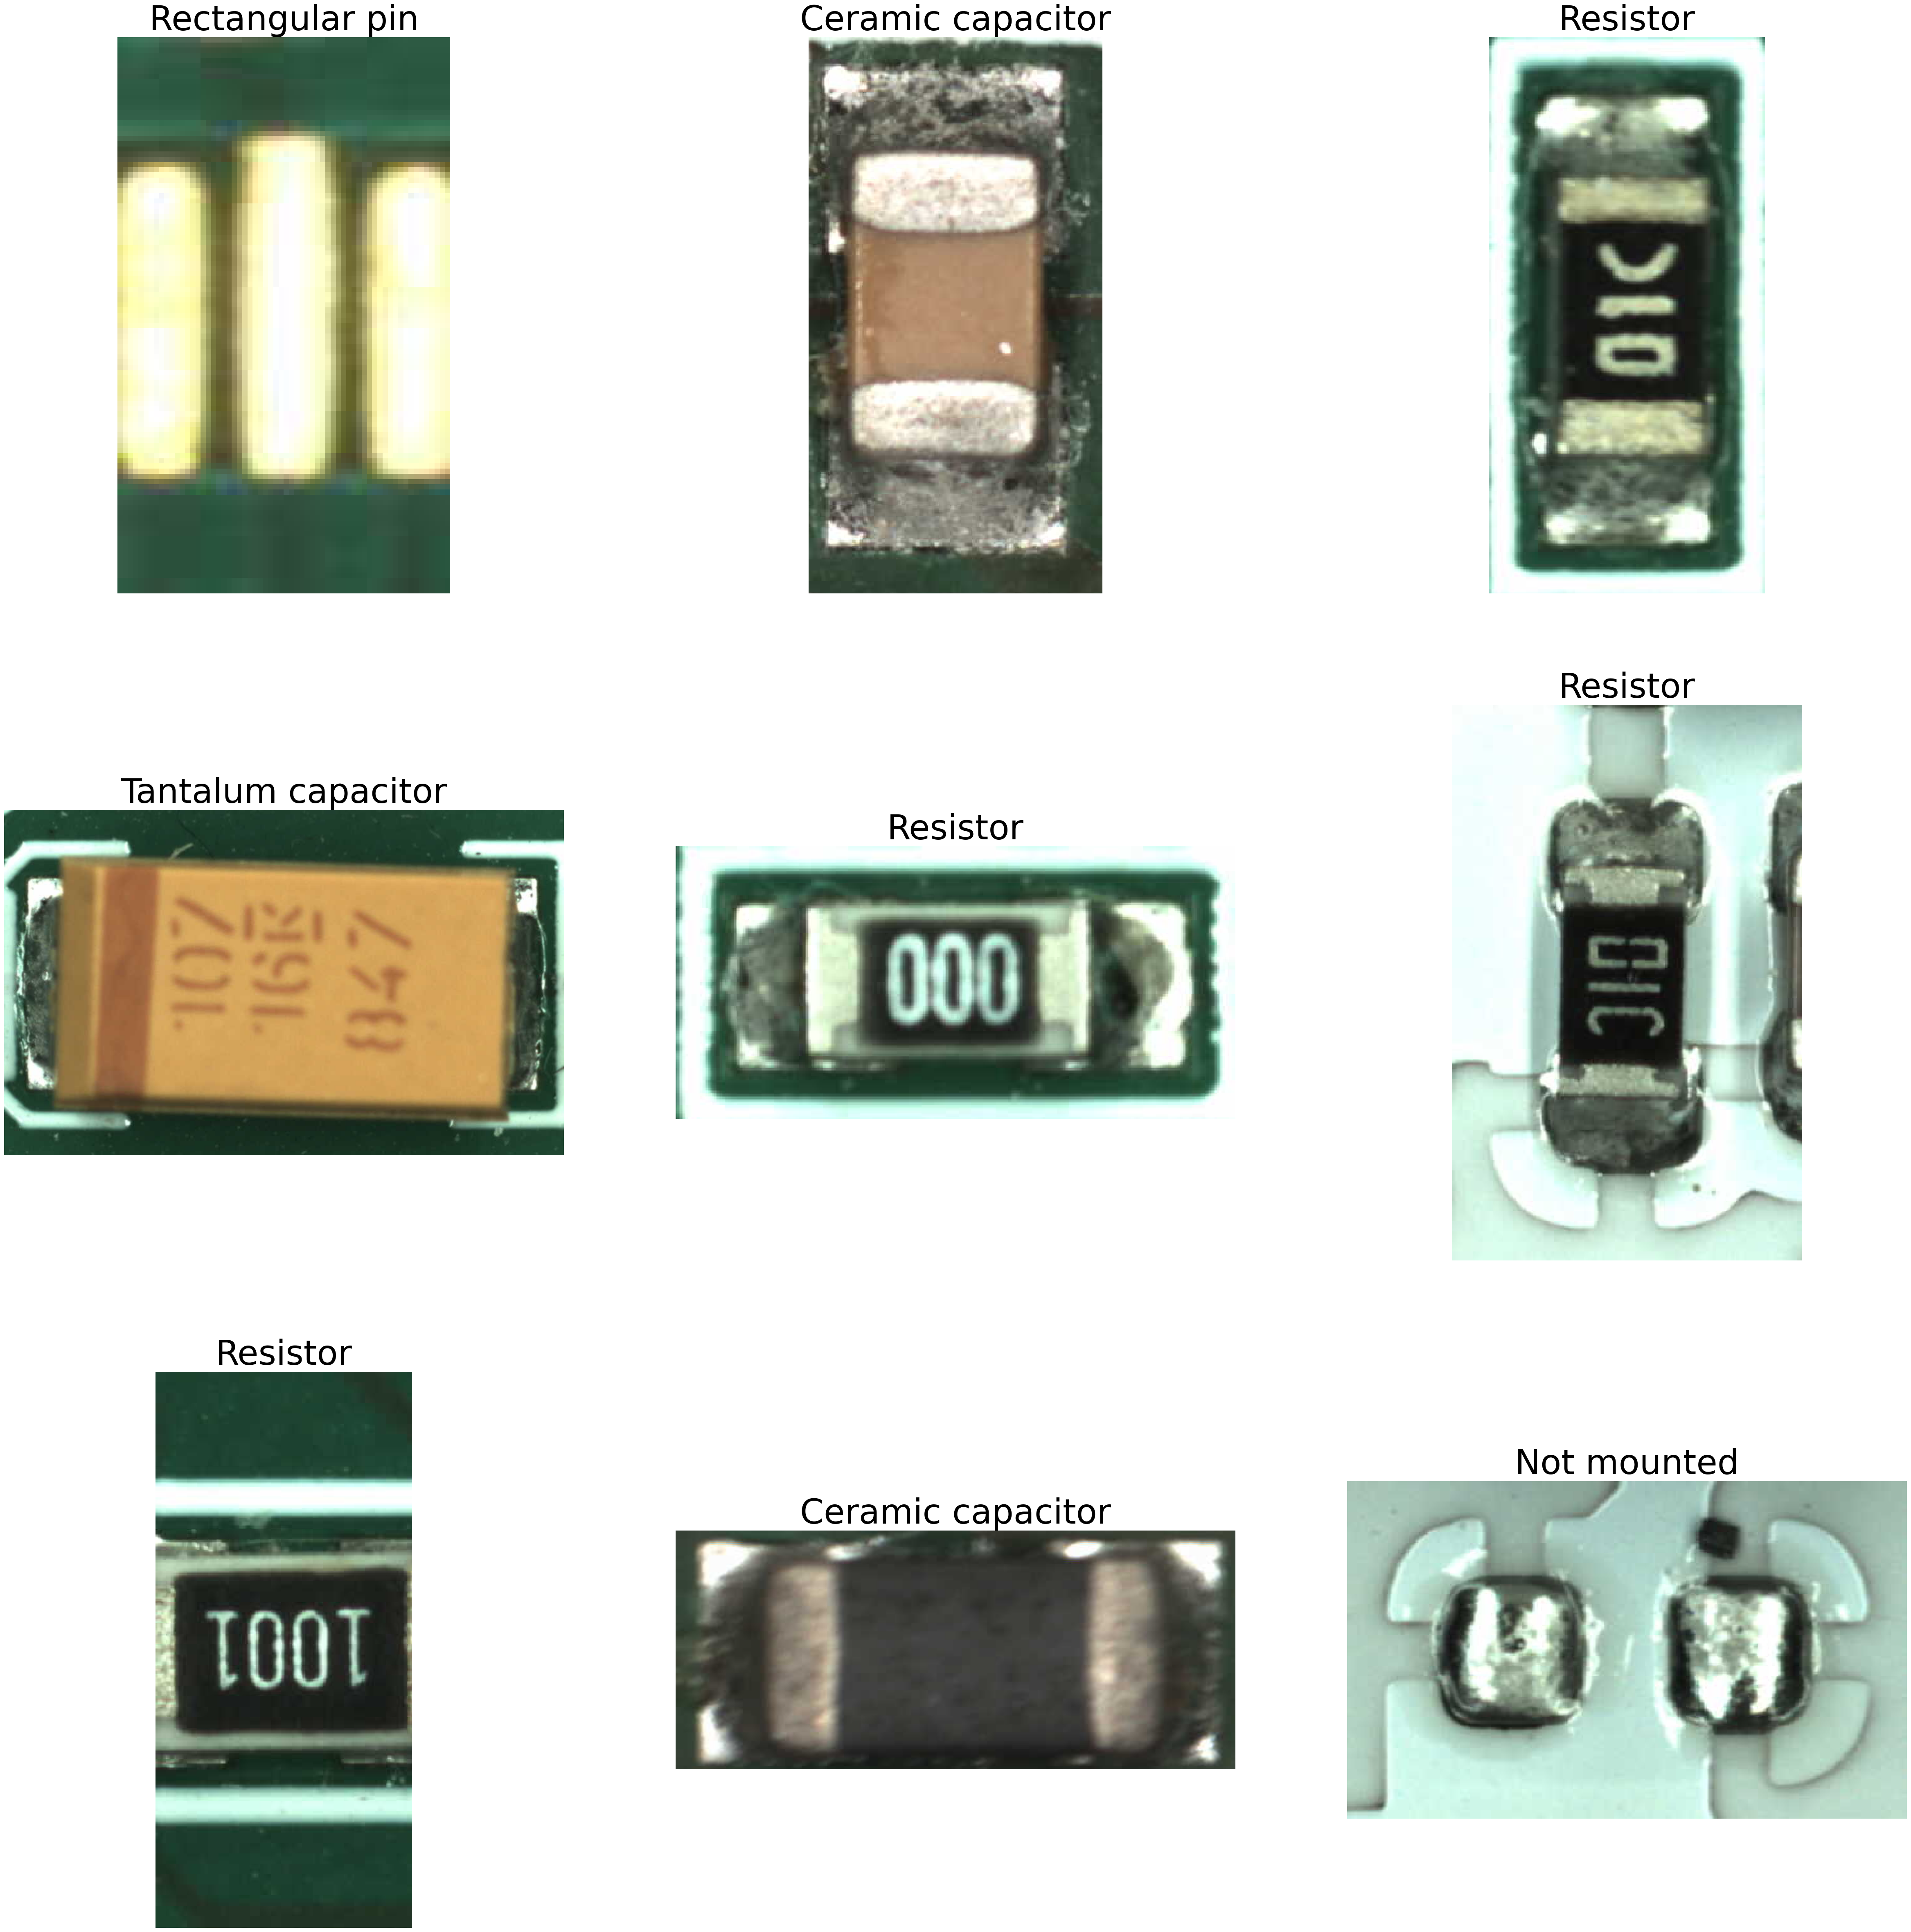

In [12]:
import matplotlib.pyplot as plt
import numpy as np
image_batch, label_batch = next(iter(validset))

plt.figure(figsize=(60, 60))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    printable_object = dataset.print_item(image_batch['print_object'][i])
    plt.imshow(printable_object)
    label = label_batch[i].numpy().decode("utf-8")
    plt.title(label, fontsize=60)
    plt.axis("off")

In [13]:
validset = dataset.apply_one_hot_encoding(validset)

In [14]:
in_dir = "out/models/ResNet2__1_2"

In [16]:
tf.get_logger().setLevel('ERROR')
model = keras.models.load_model(in_dir)

1/1 [==============================] - 0s 211ms/step
Predicted label: Resistor
Real label: Resistor


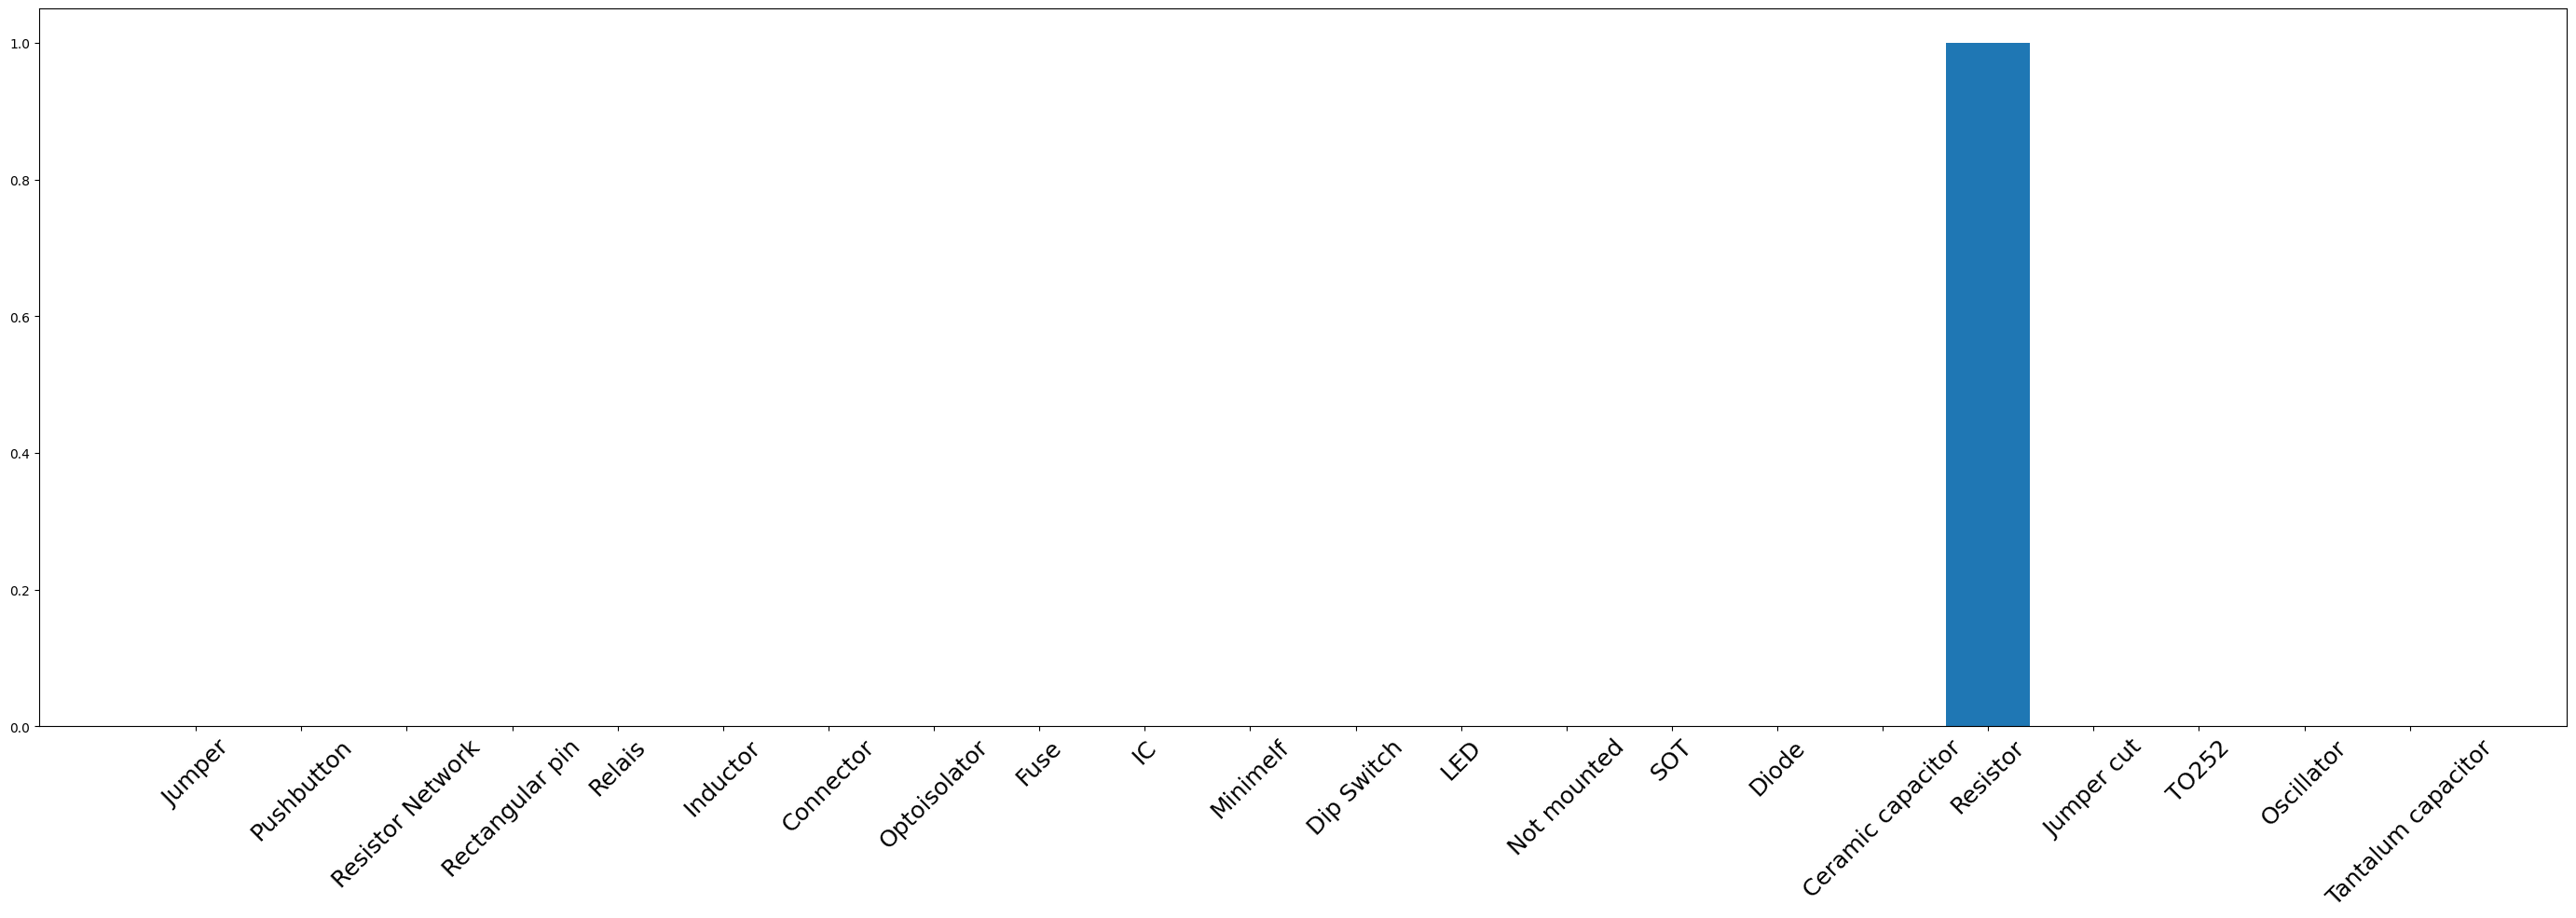

1/1 [==============================] - 0s 196ms/step
Predicted label: Not mounted
Real label: Not mounted


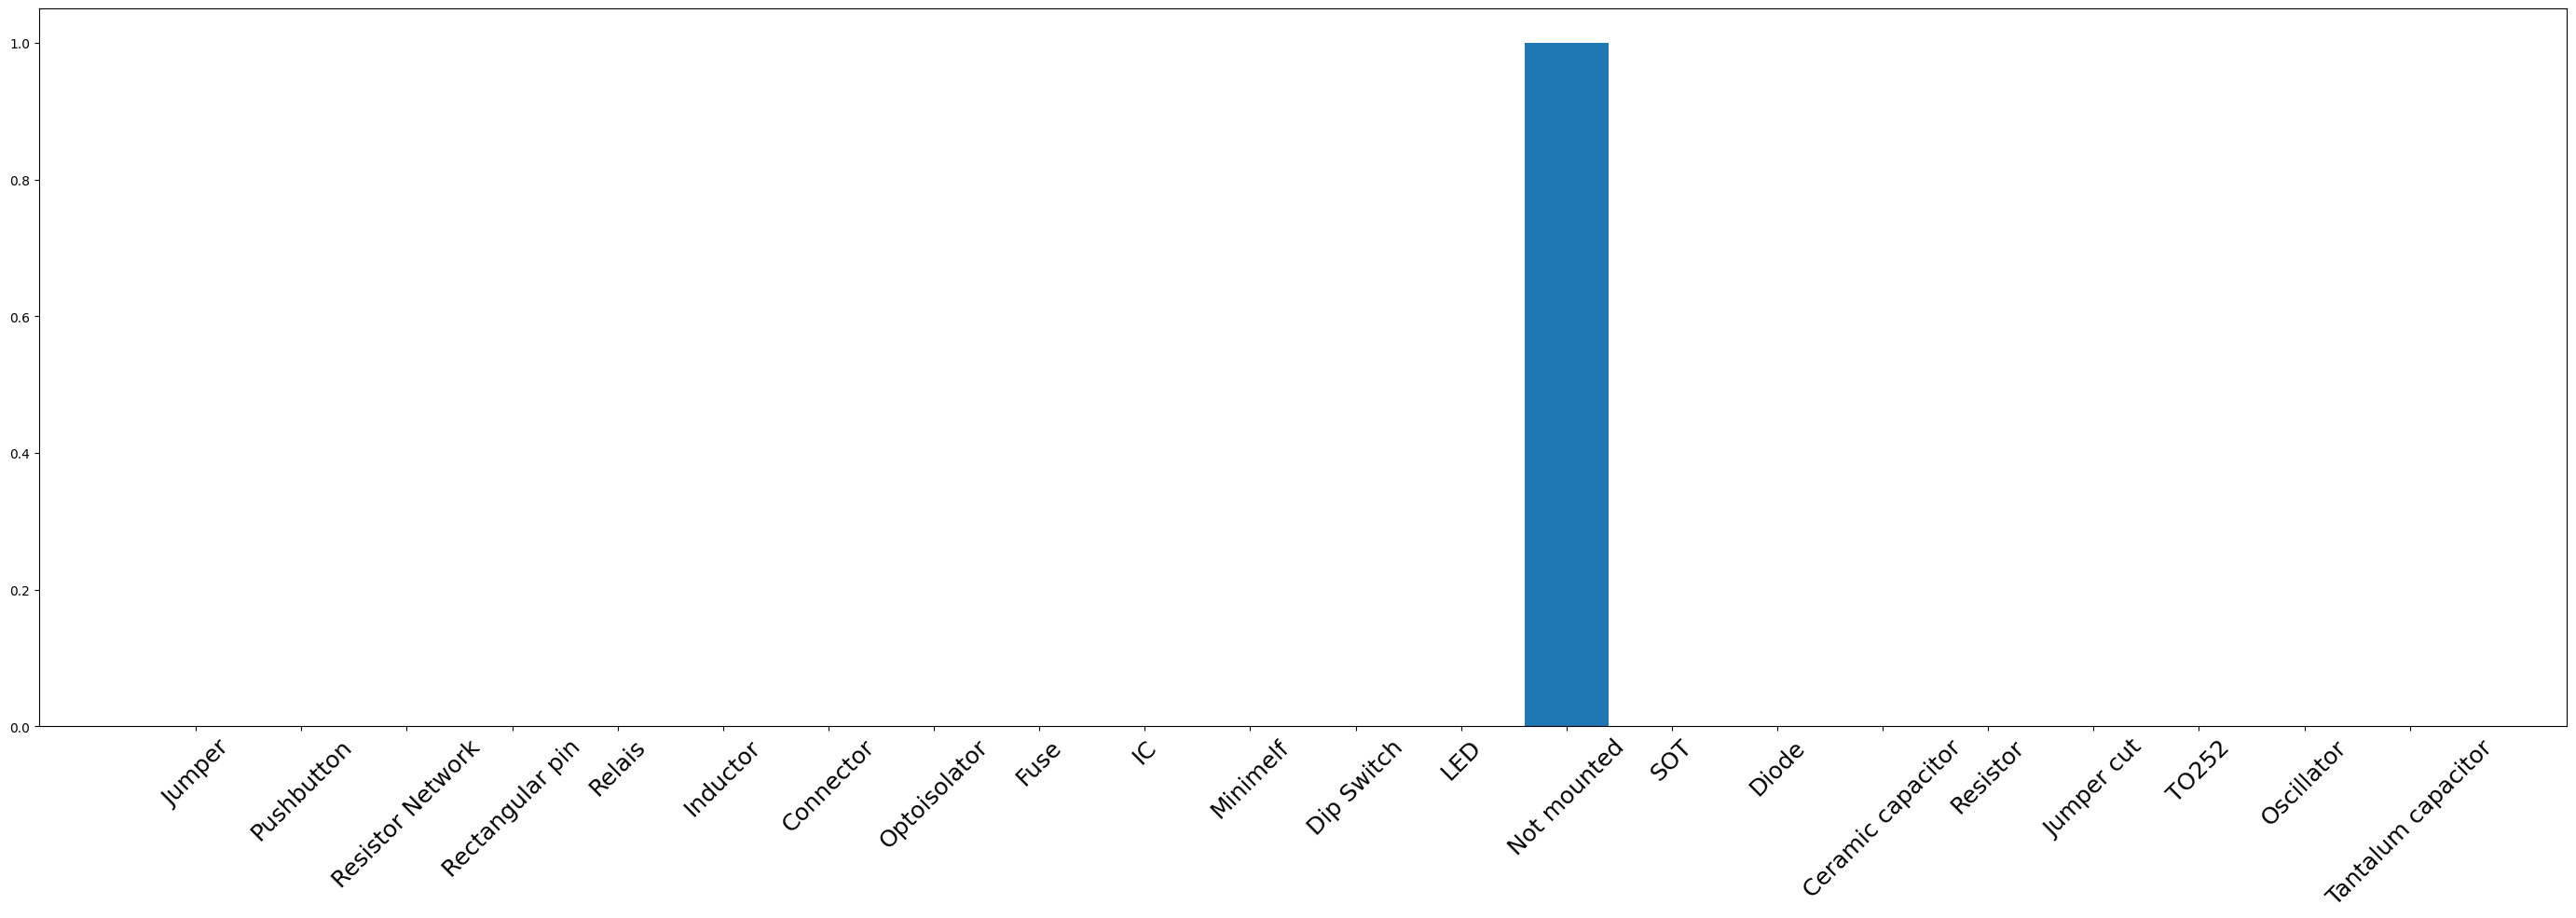

1/1 [==============================] - 0s 180ms/step
Predicted label: Resistor
Real label: Resistor


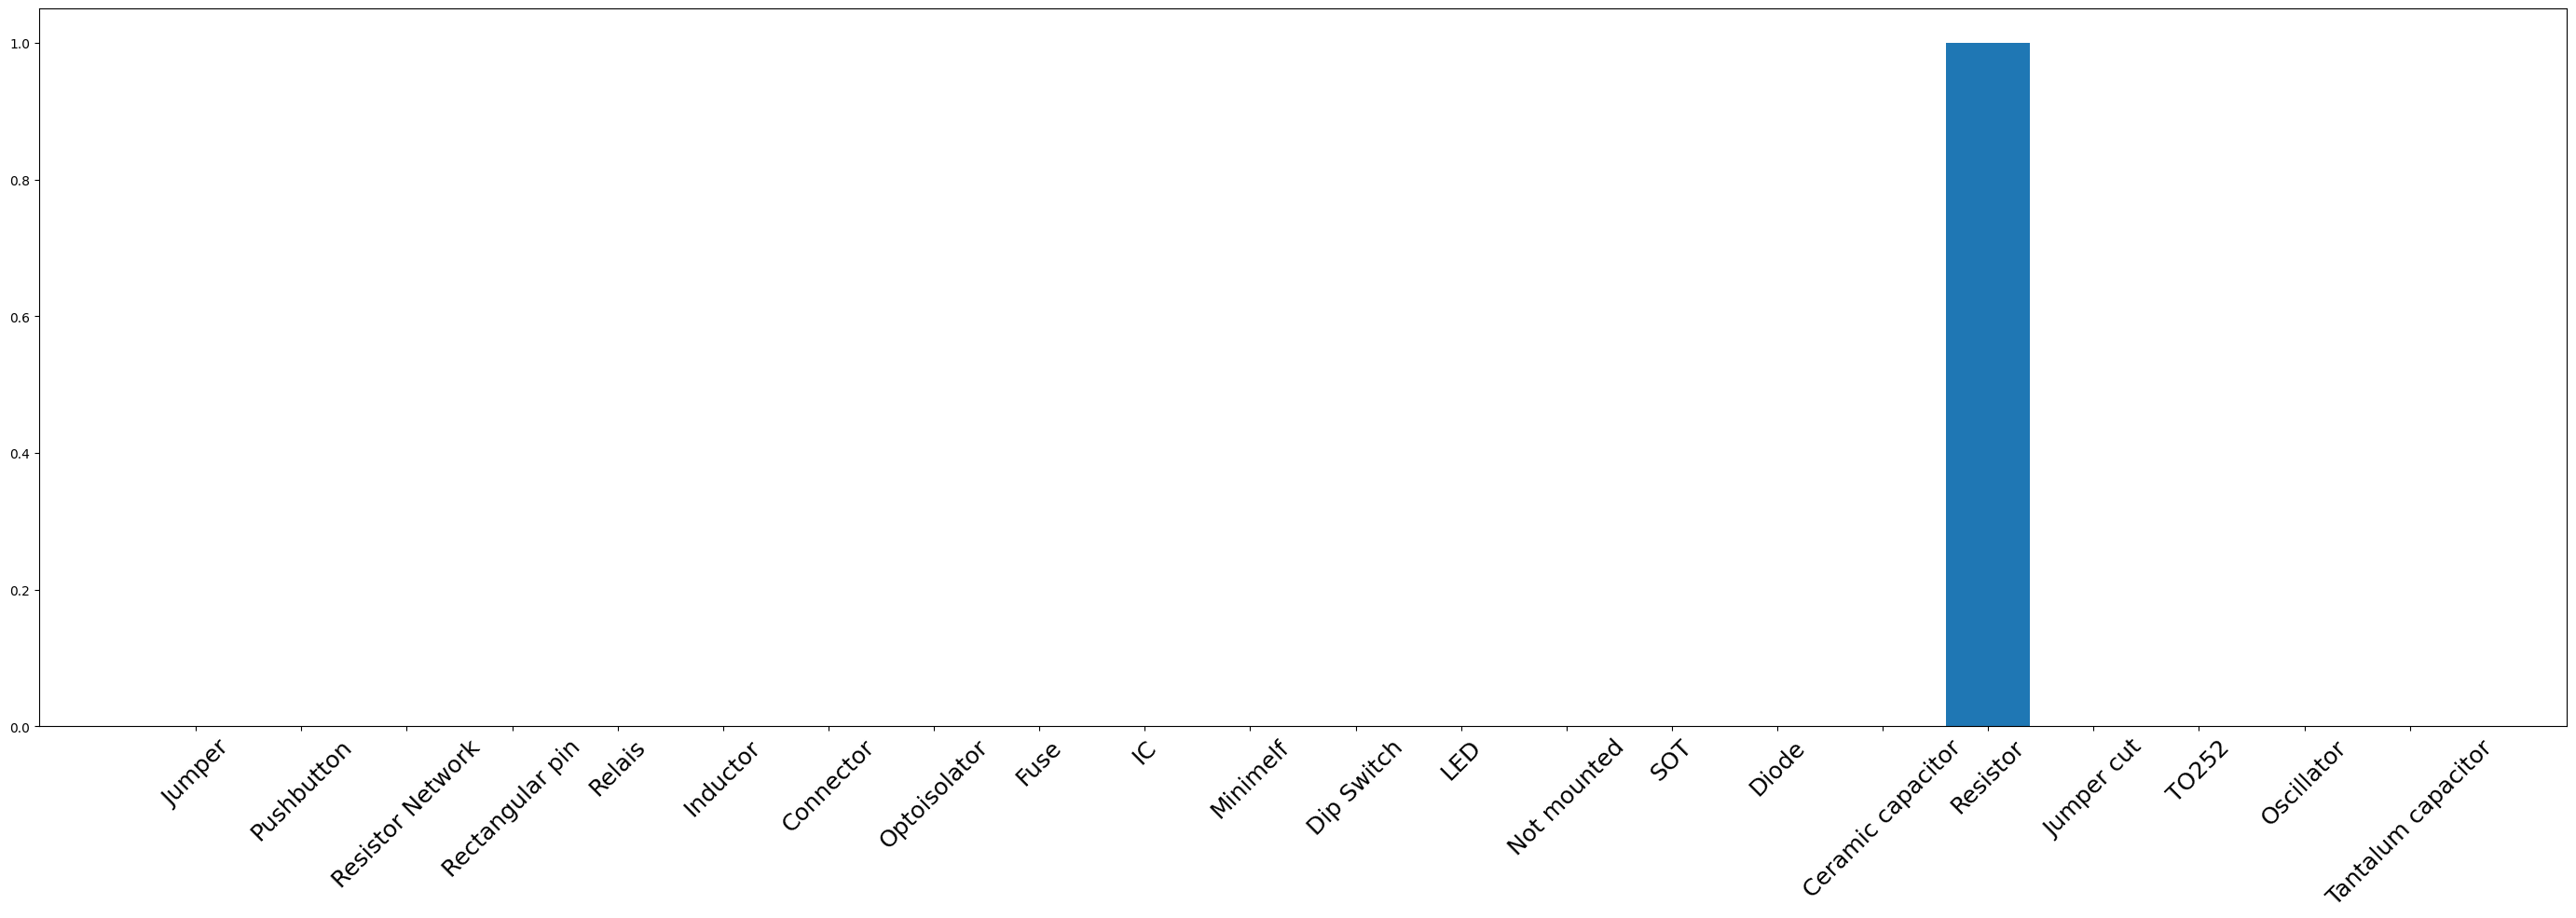

1/1 [==============================] - 0s 170ms/step
Predicted label: Minimelf
Real label: Minimelf


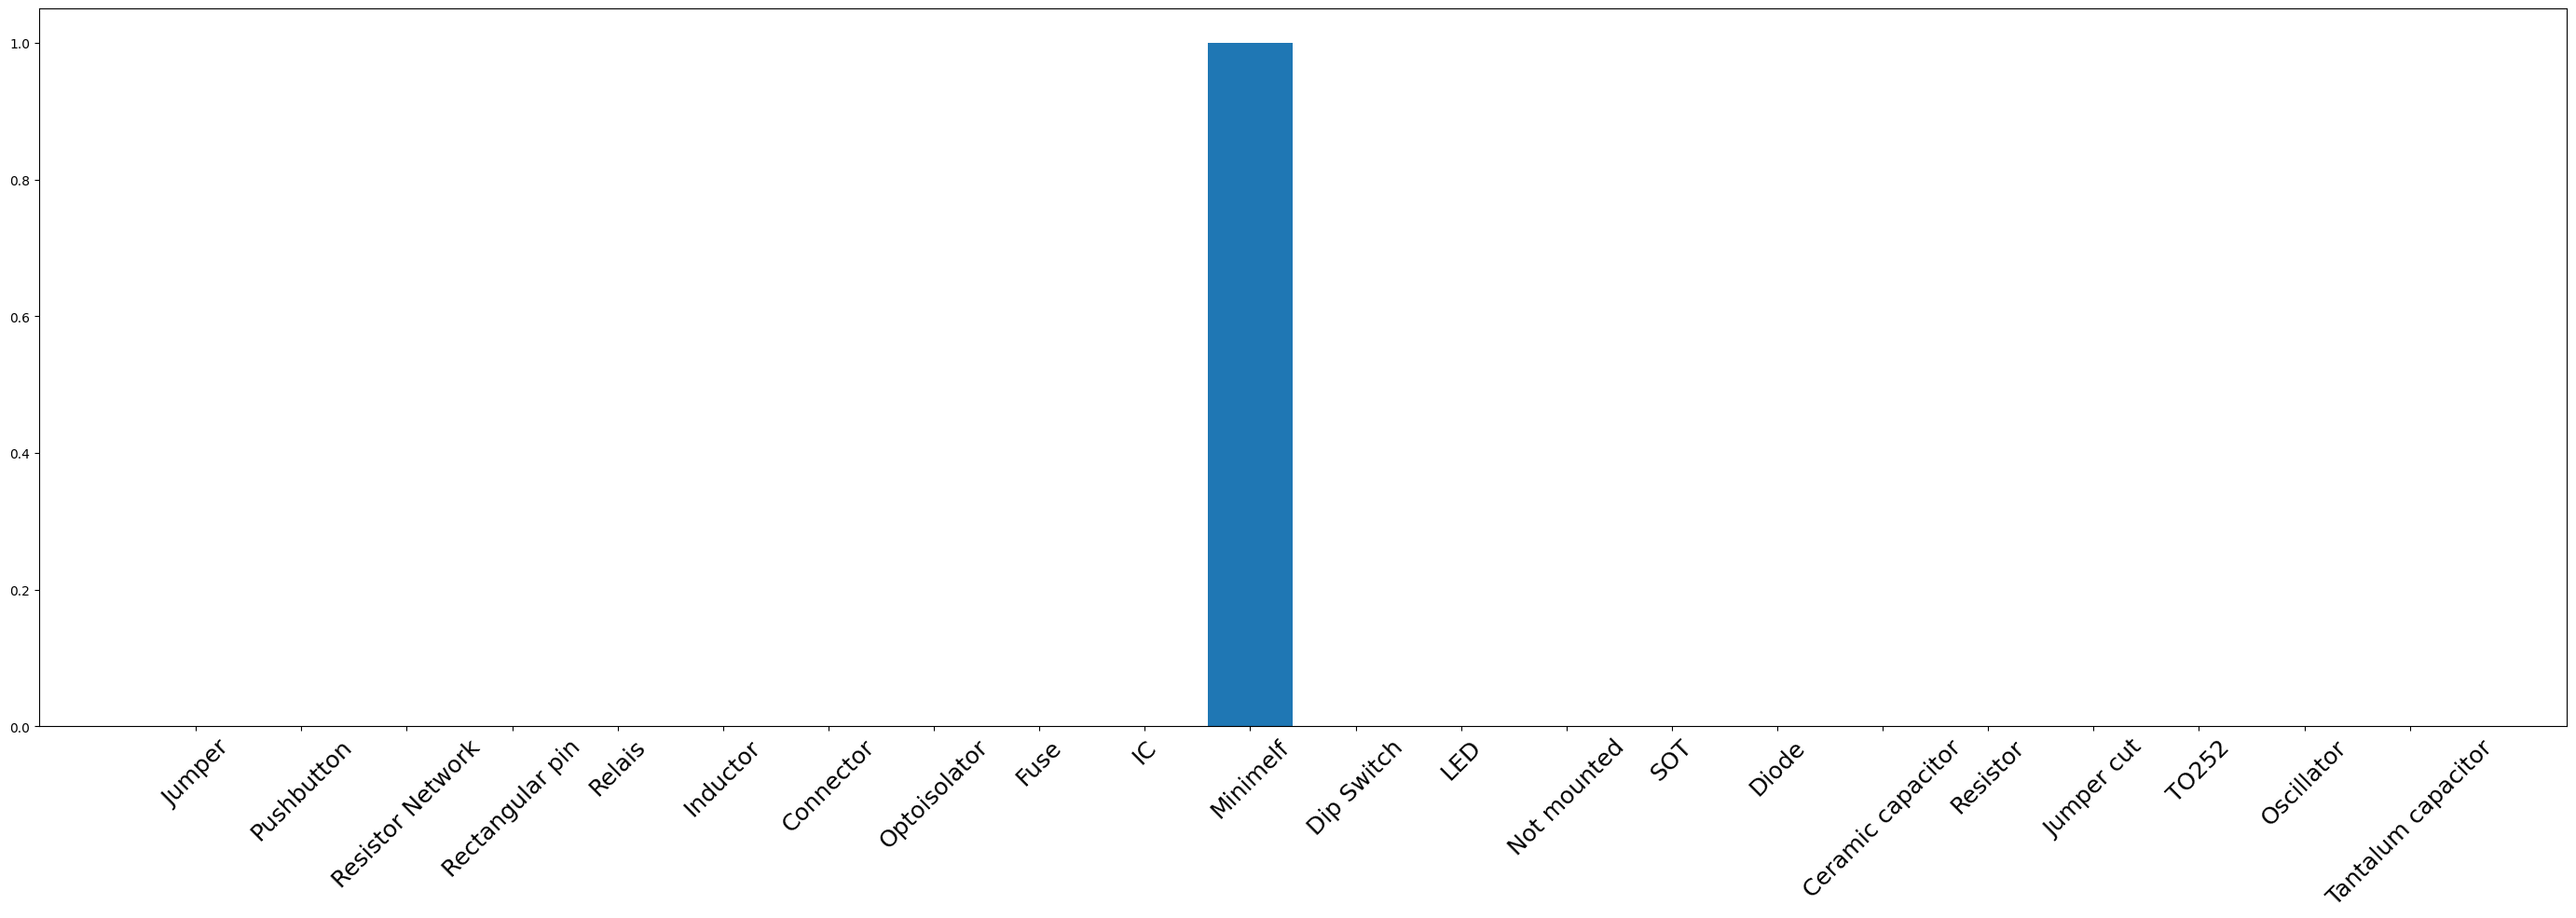

1/1 [==============================] - 0s 166ms/step
Predicted label: Ceramic capacitor
Real label: Ceramic capacitor


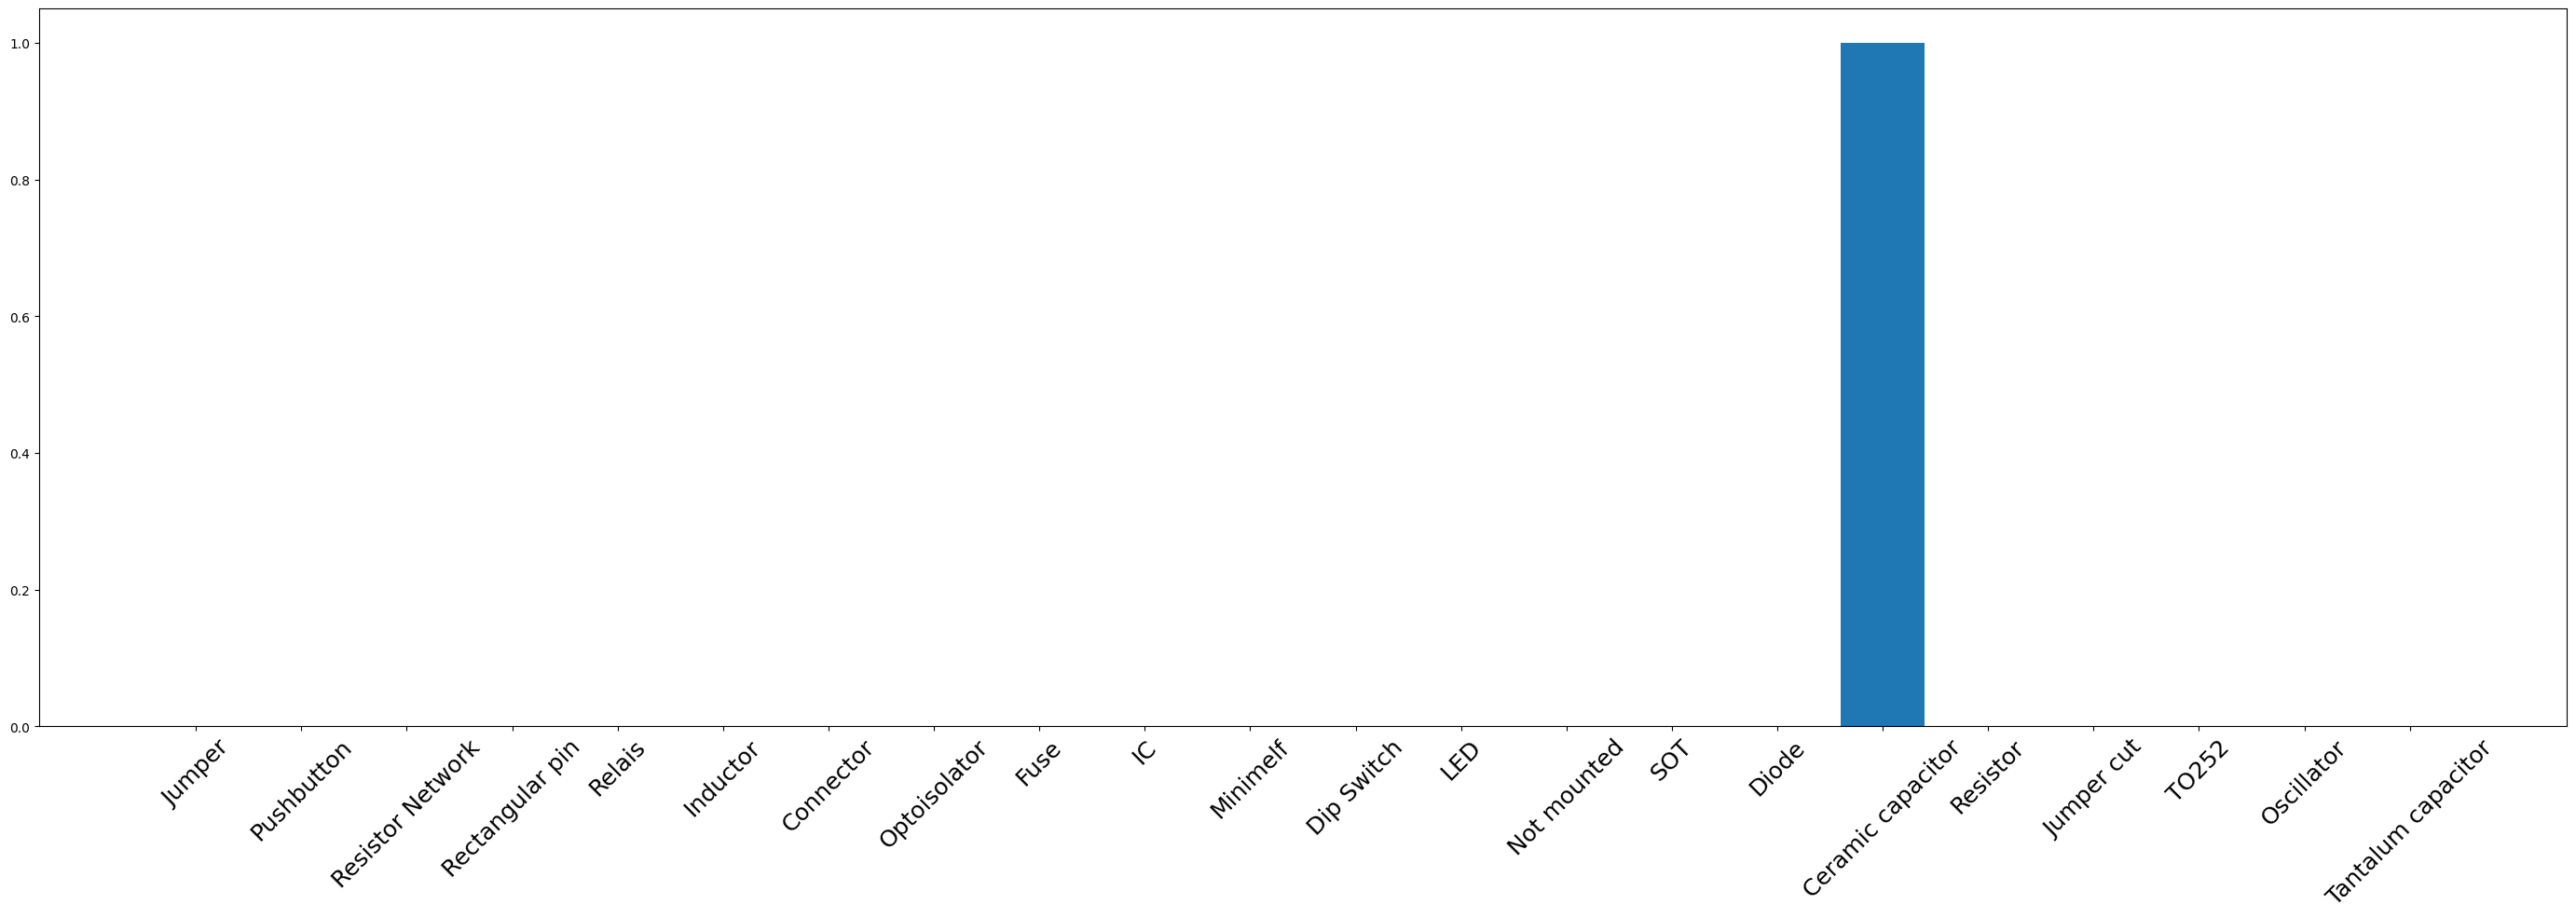

1/1 [==============================] - 0s 168ms/step
Predicted label: Resistor
Real label: Resistor


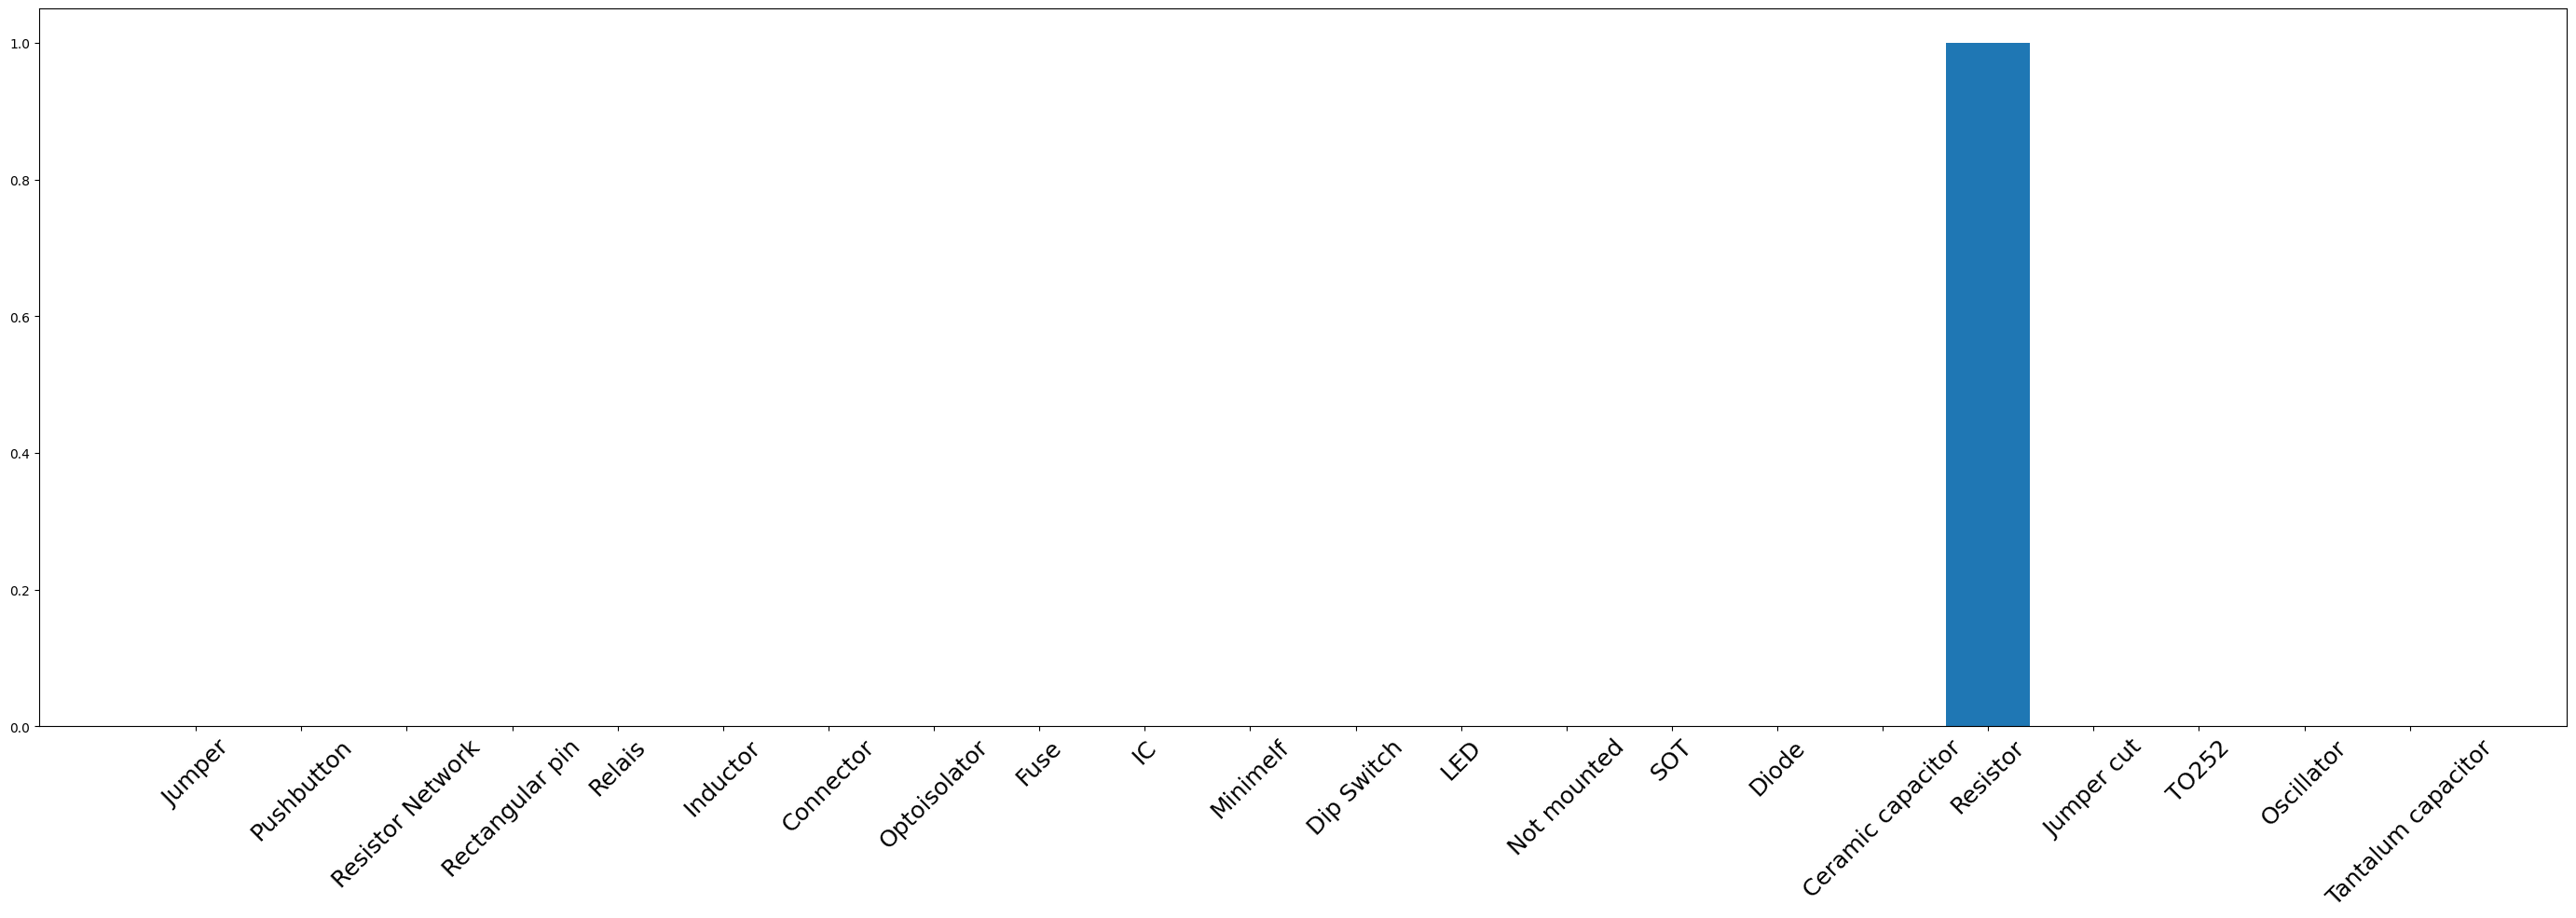

1/1 [==============================] - 0s 168ms/step
Predicted label: Rectangular pin
Real label: Rectangular pin


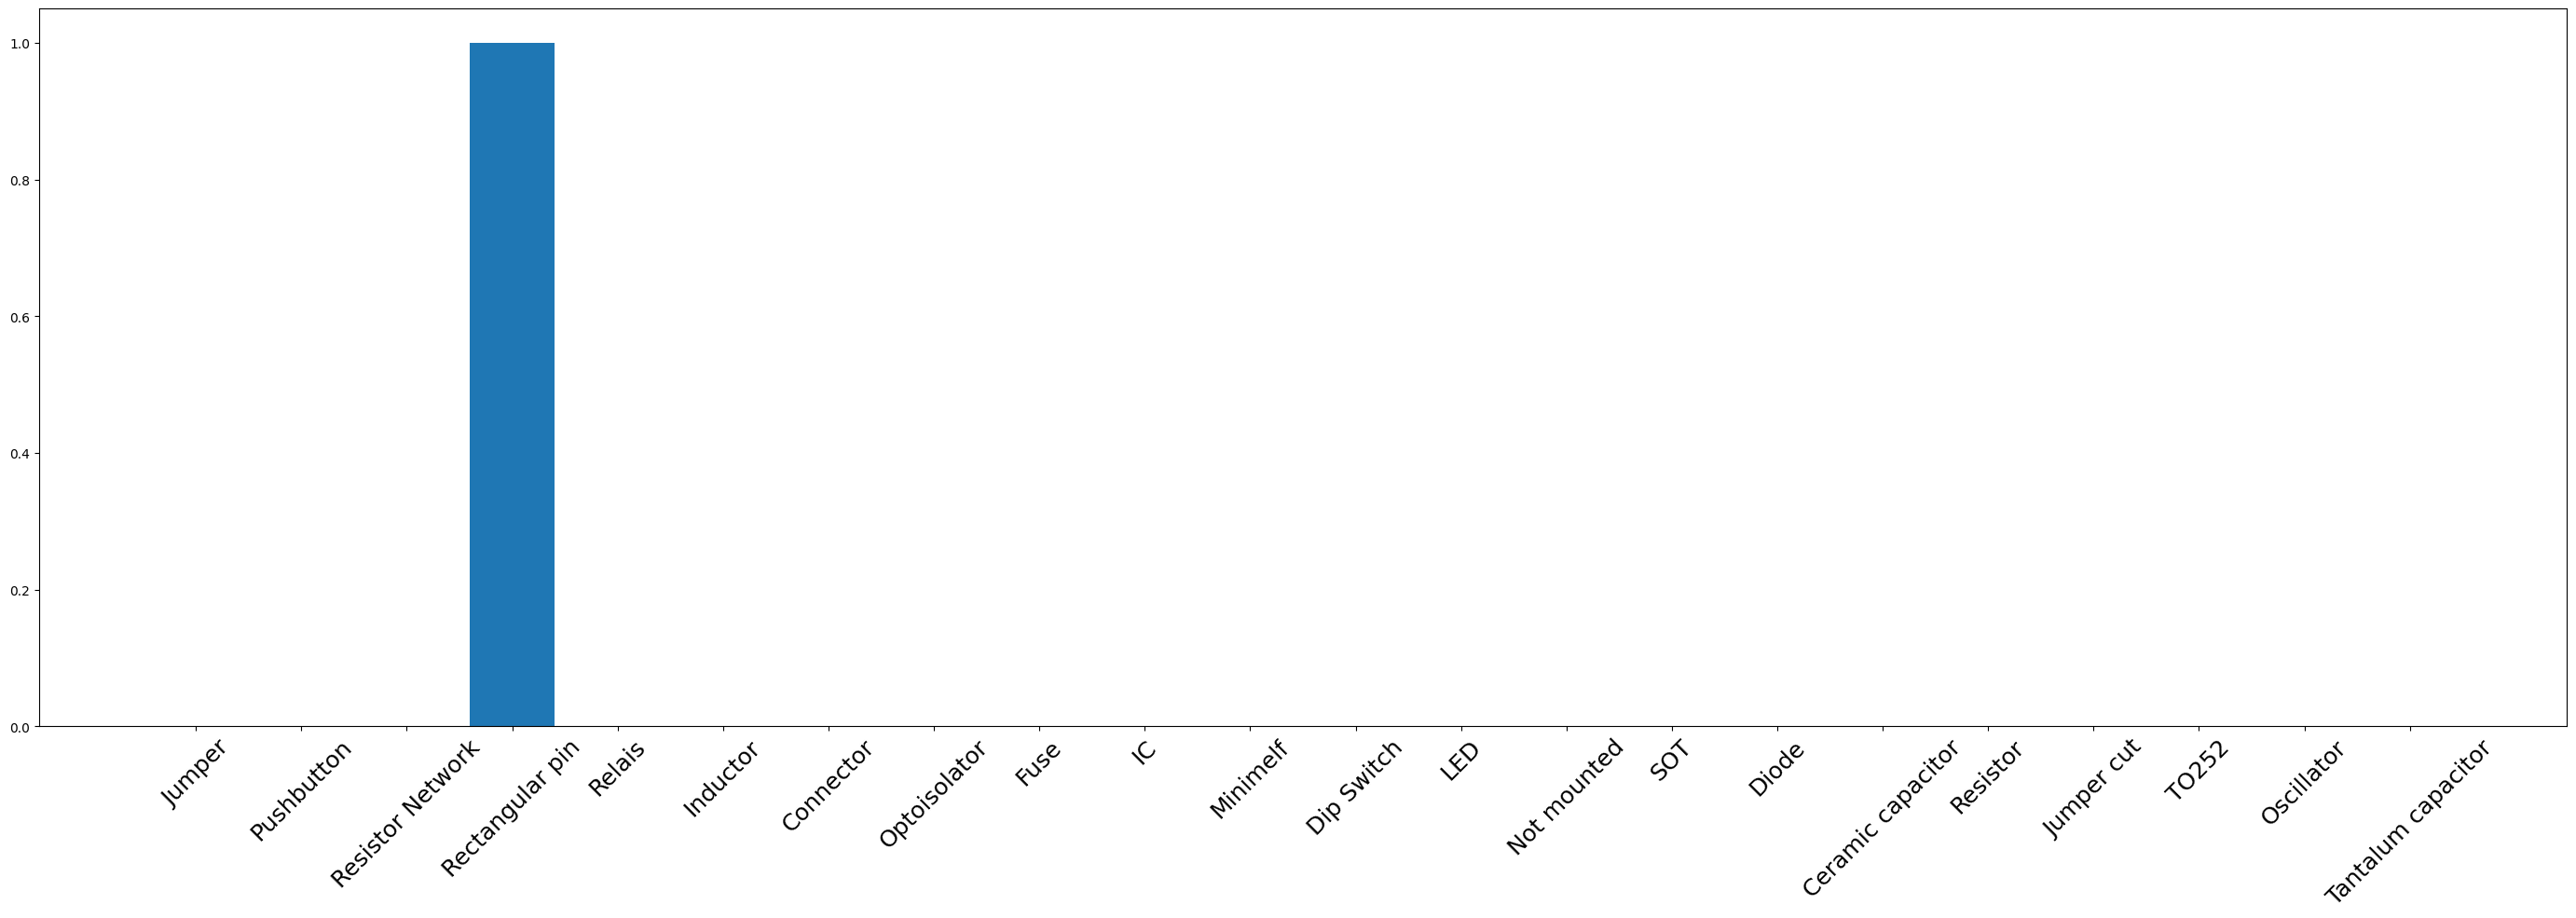

1/1 [==============================] - 0s 167ms/step
Predicted label: Rectangular pin
Real label: Rectangular pin


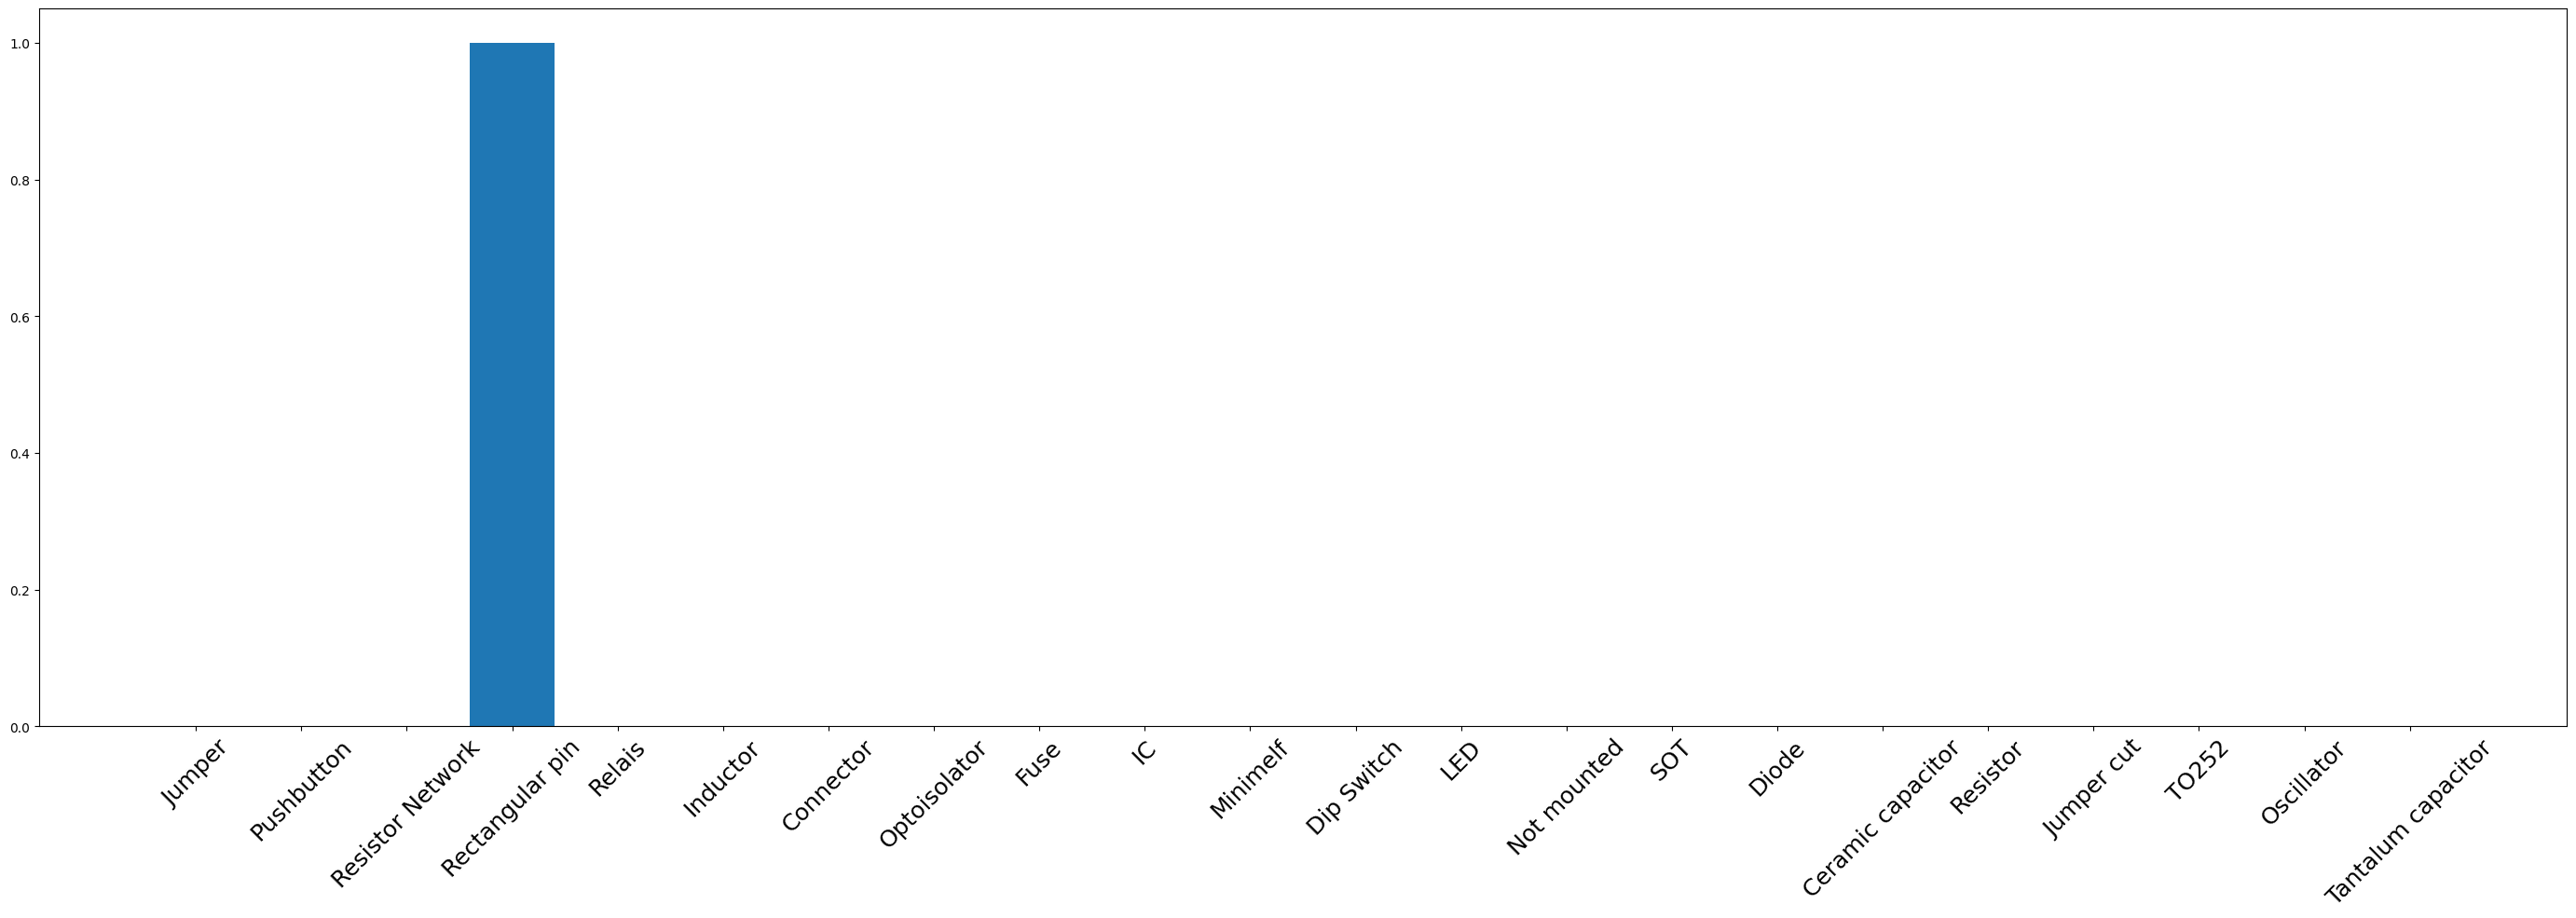

1/1 [==============================] - 0s 169ms/step
Predicted label: Rectangular pin
Real label: Rectangular pin


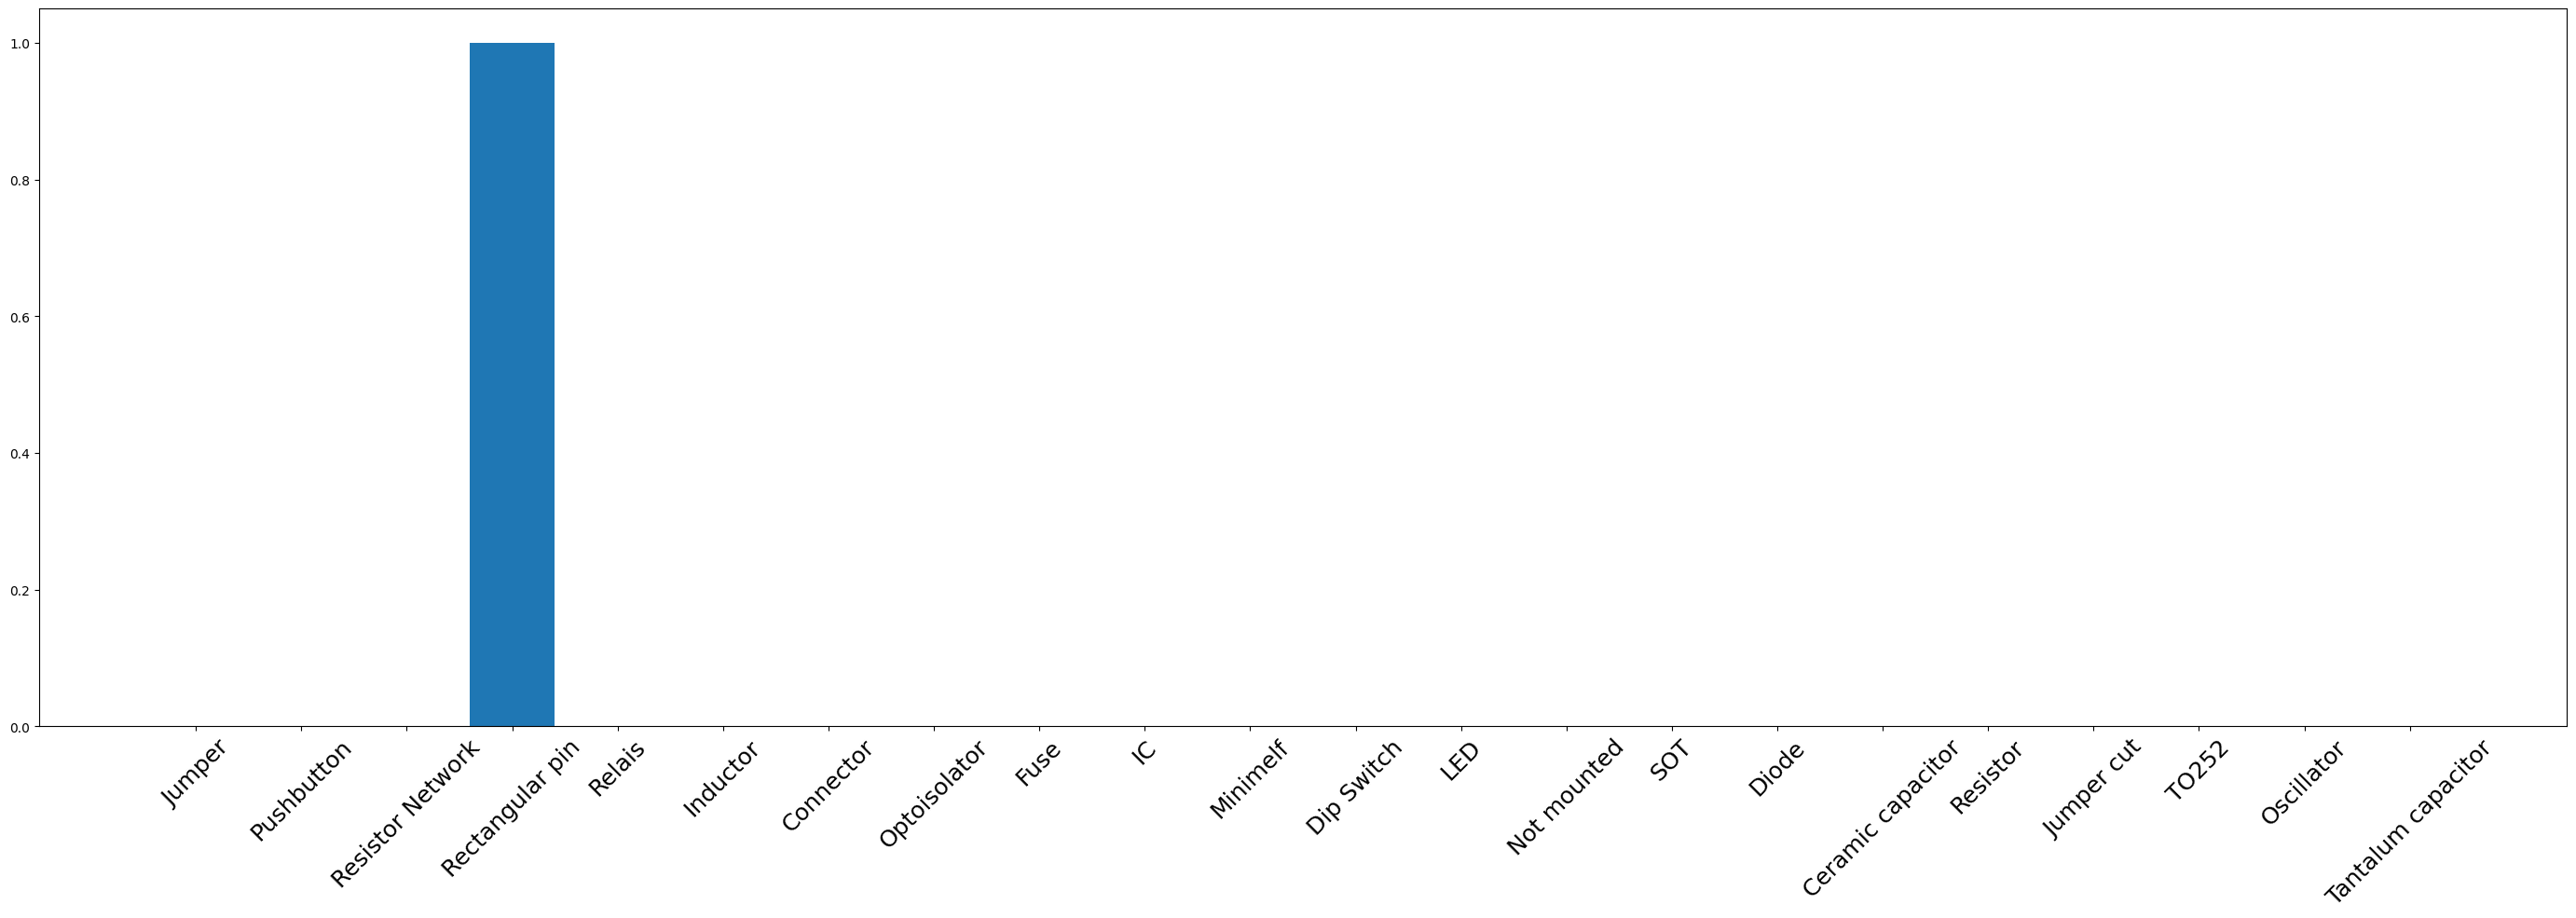

1/1 [==============================] - 0s 172ms/step
Predicted label: SOT
Real label: SOT


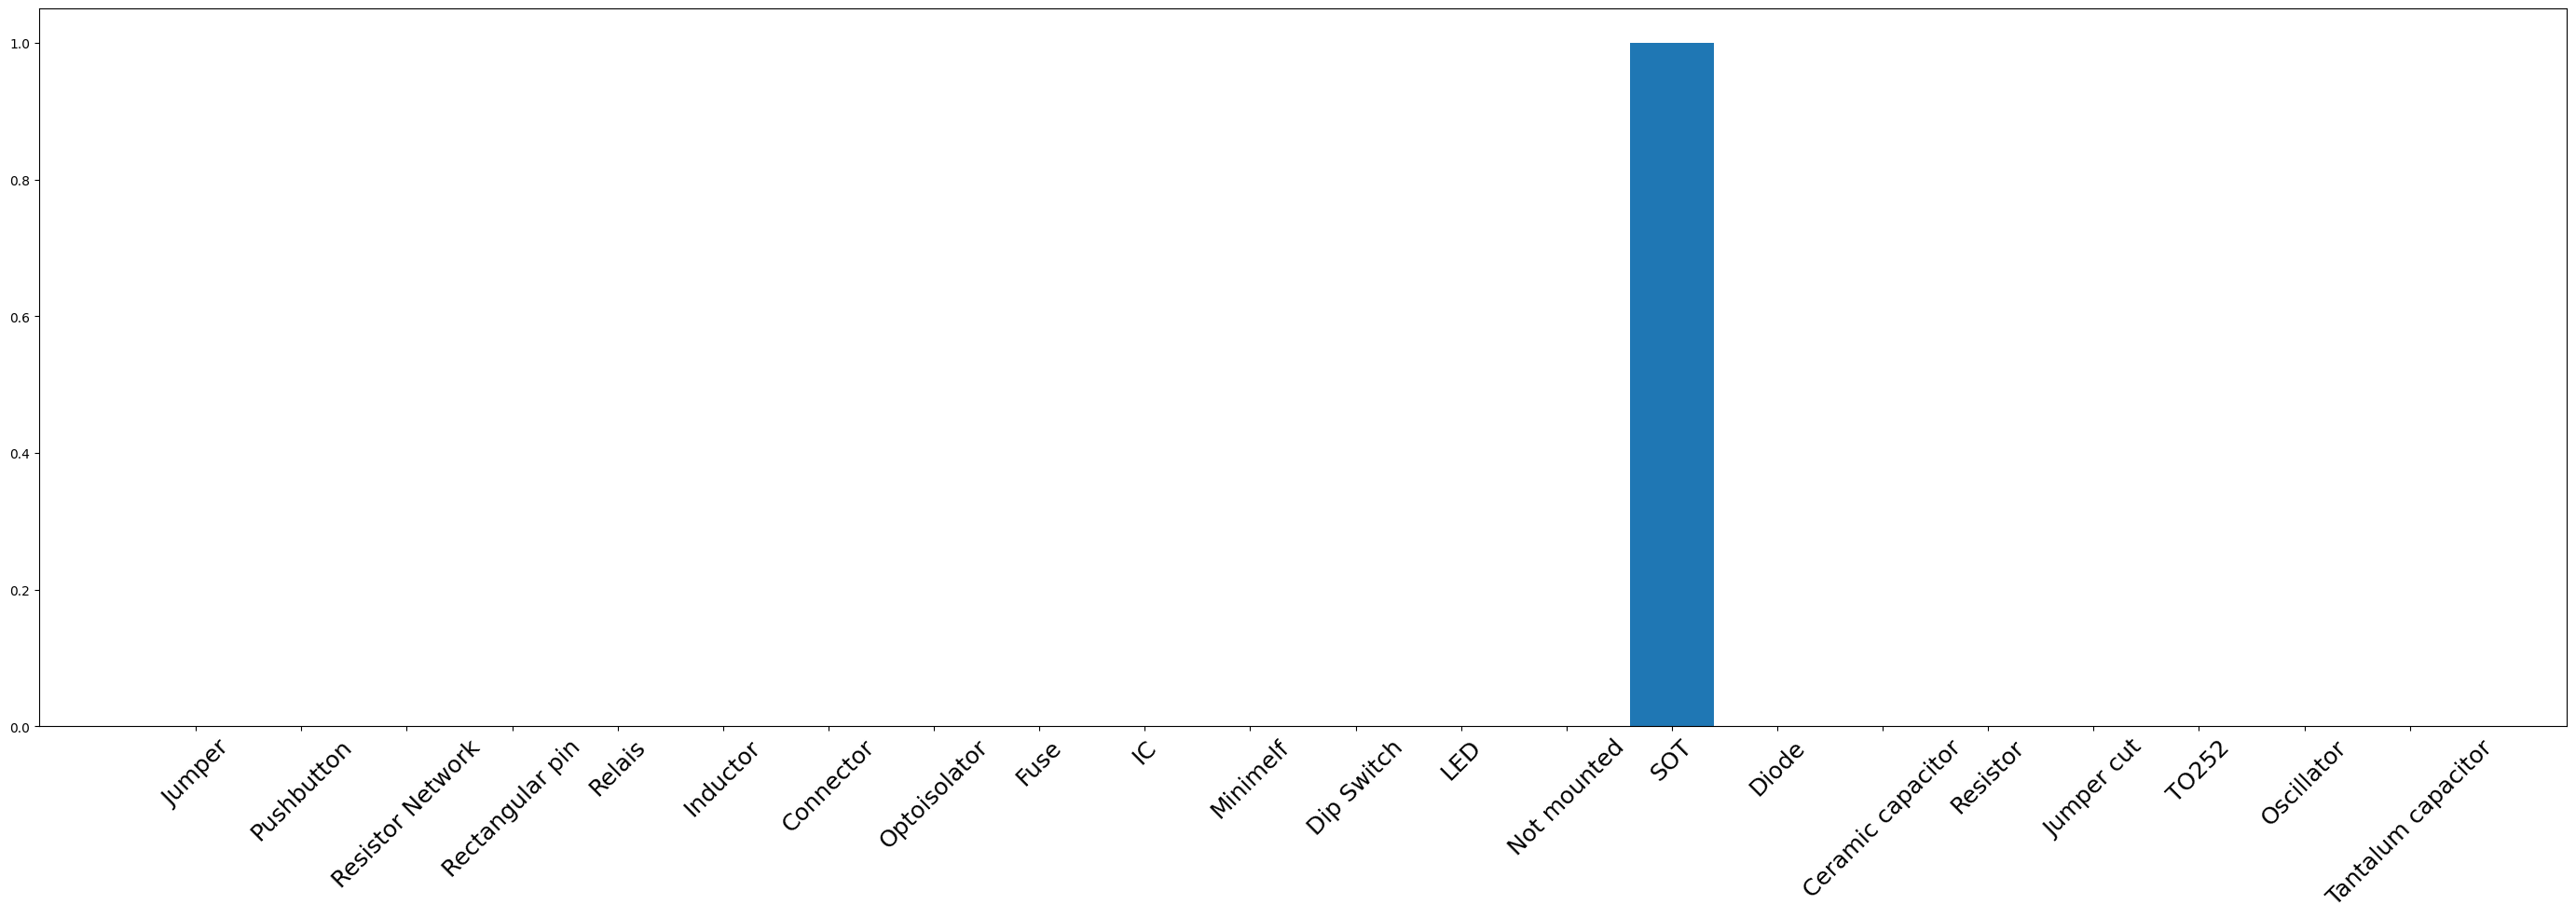

1/1 [==============================] - 0s 167ms/step
Predicted label: Ceramic capacitor
Real label: Ceramic capacitor


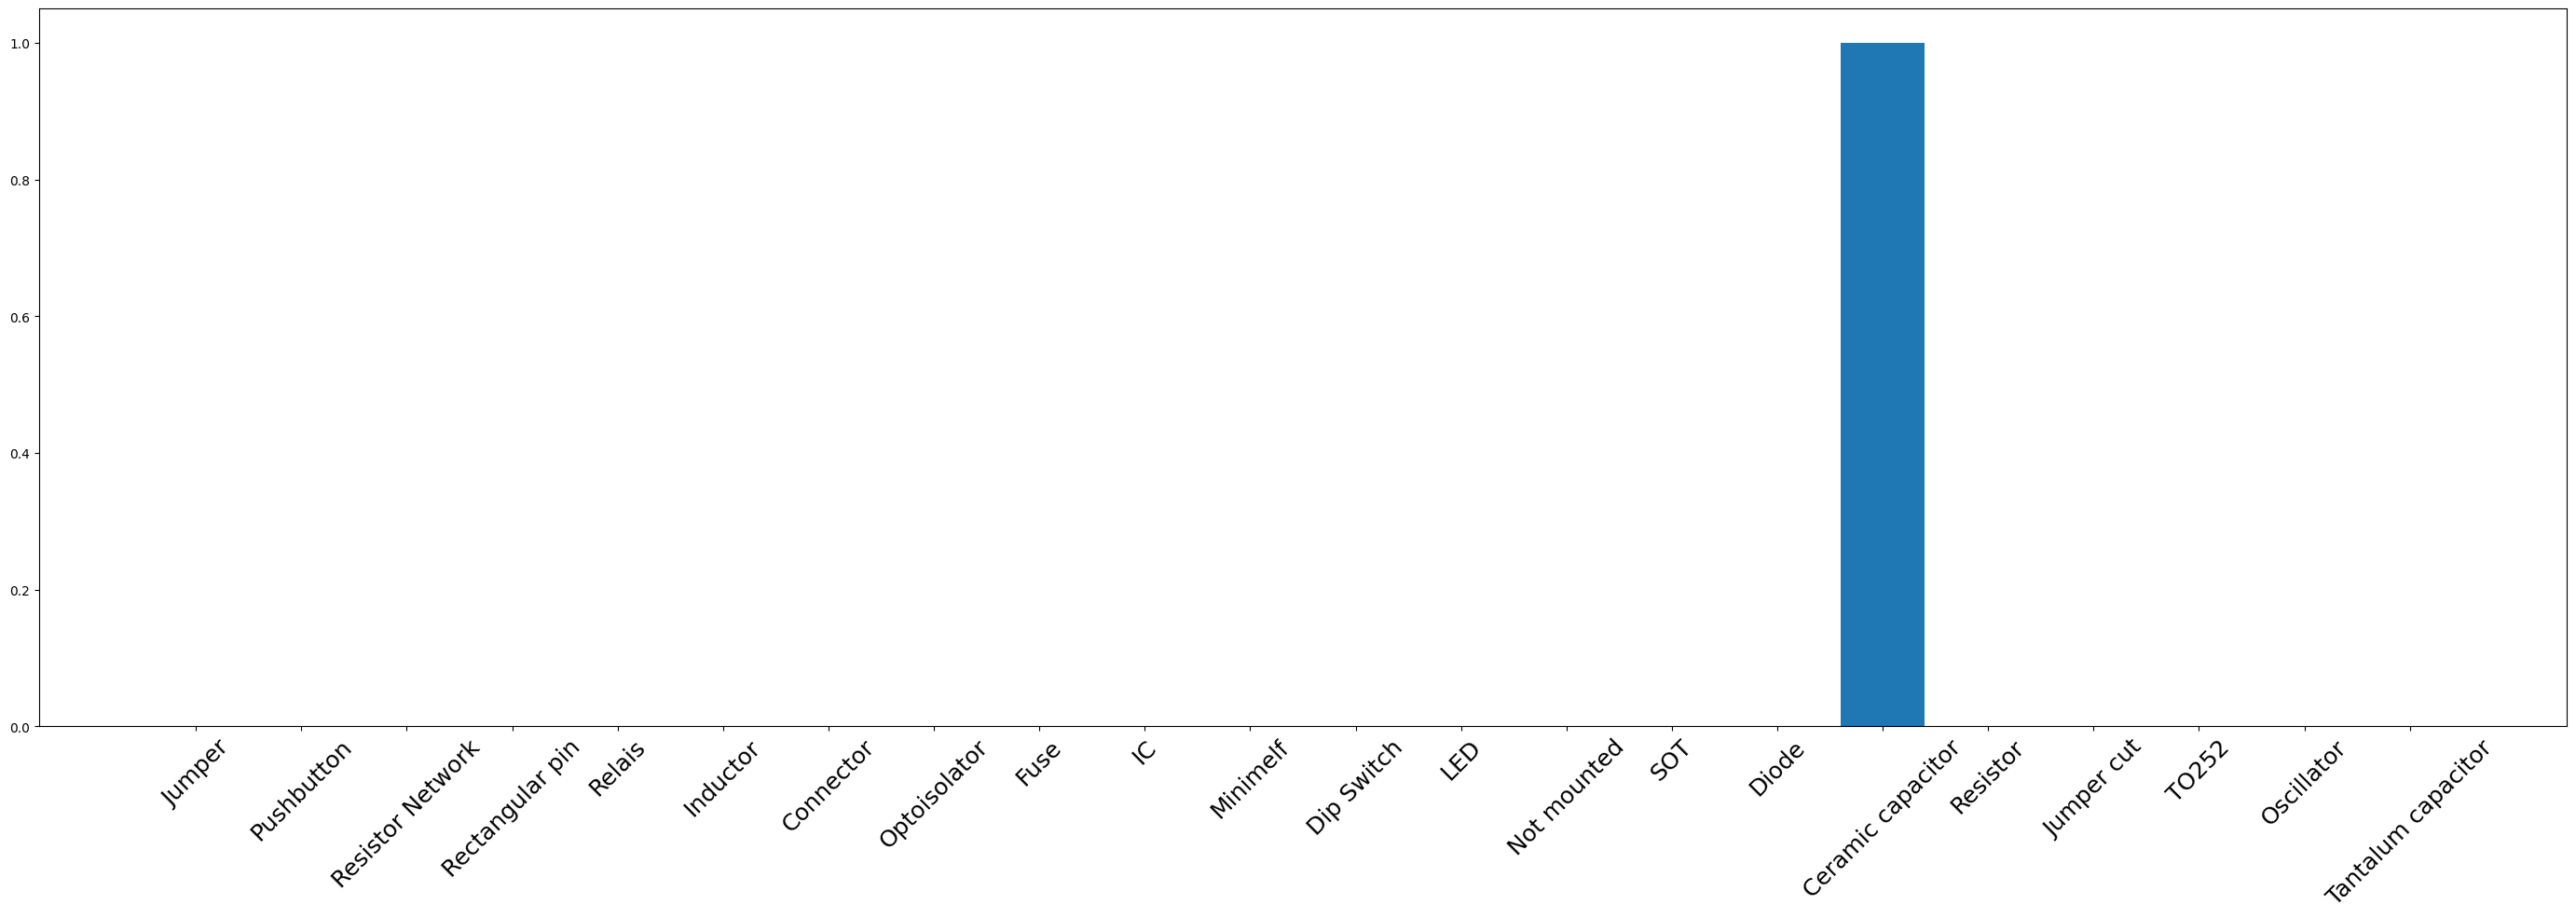

1/1 [==============================] - 0s 170ms/step
Predicted label: Resistor
Real label: Resistor


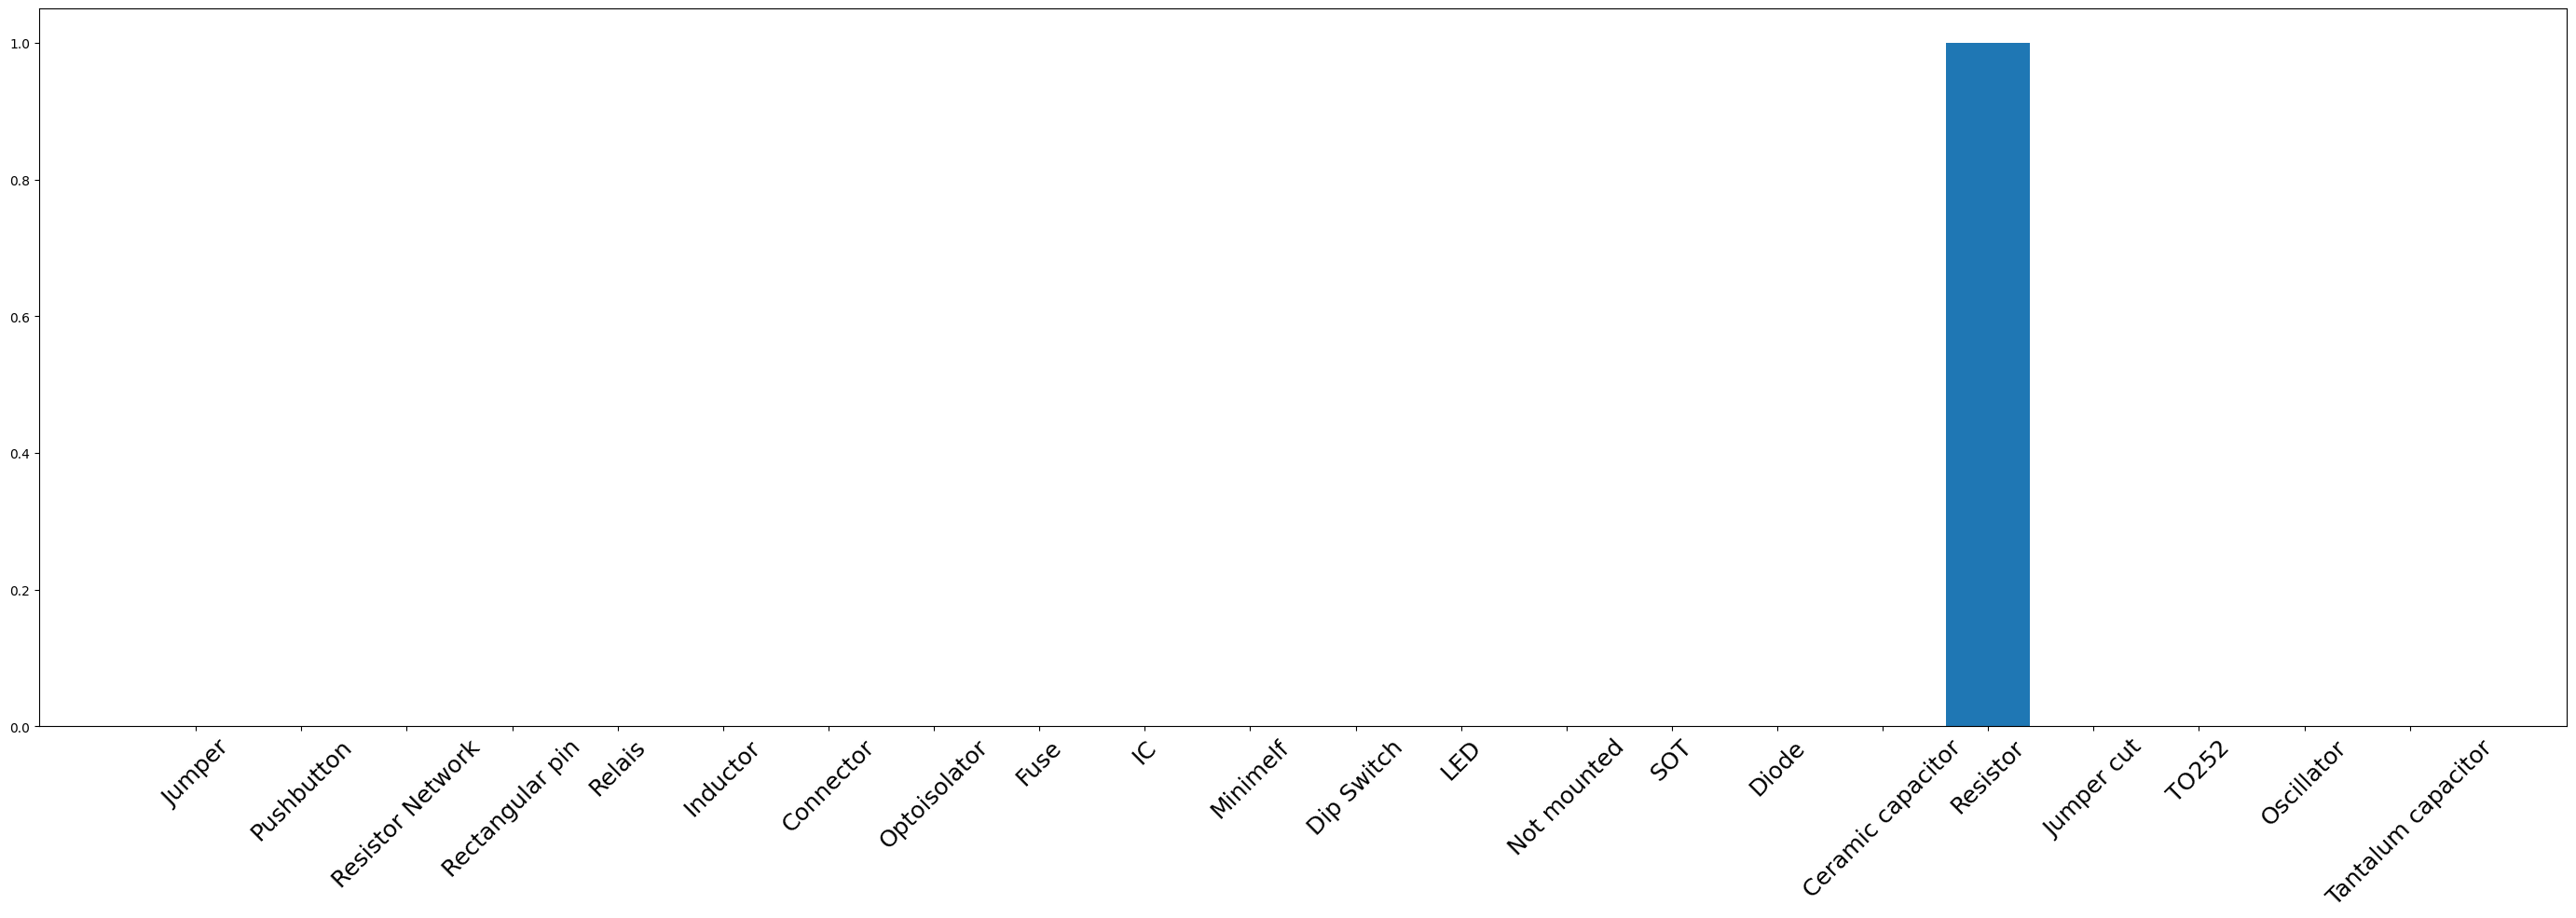

1/1 [==============================] - 0s 178ms/step
Predicted label: Resistor
Real label: Resistor


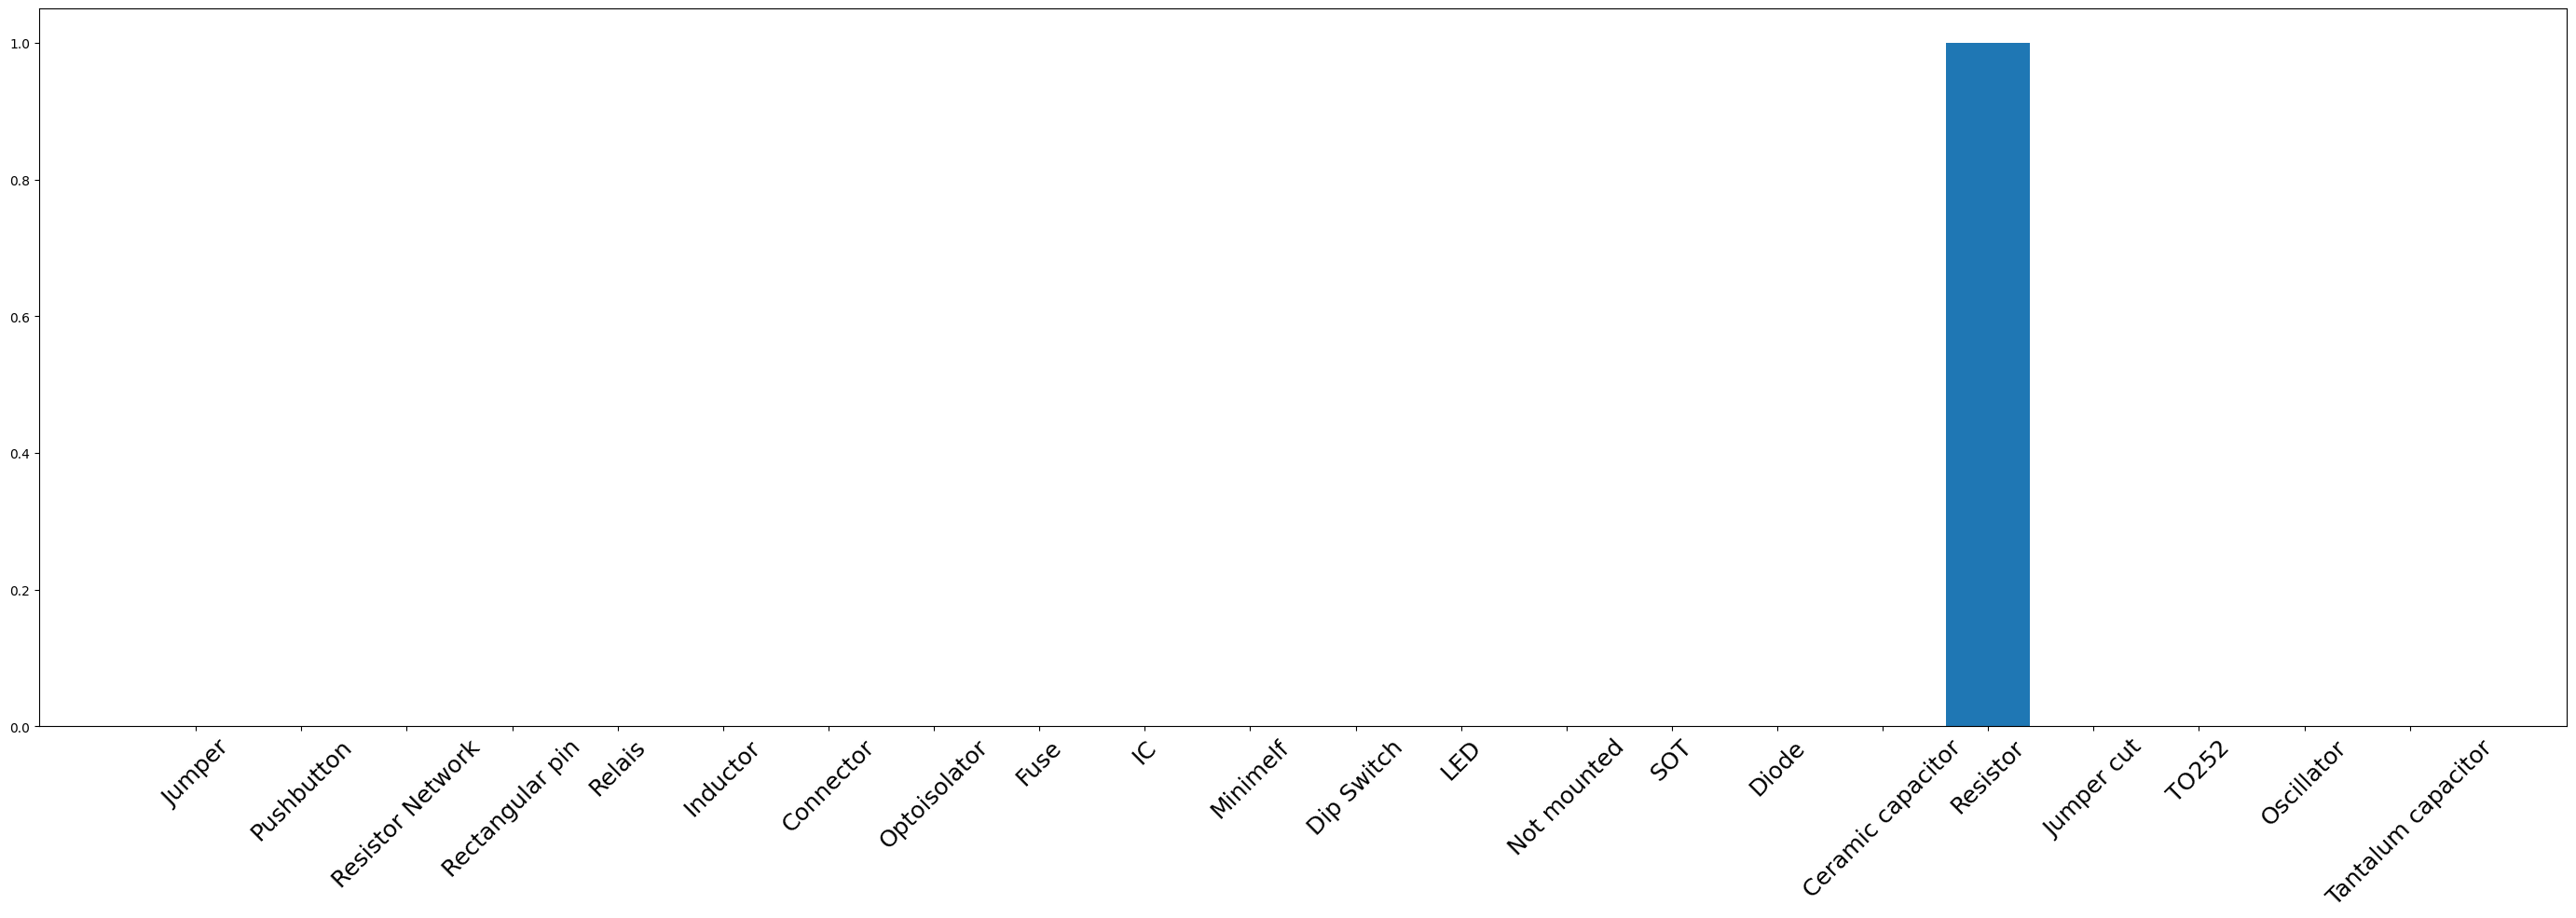

1/1 [==============================] - 0s 173ms/step
Predicted label: Rectangular pin
Real label: Rectangular pin


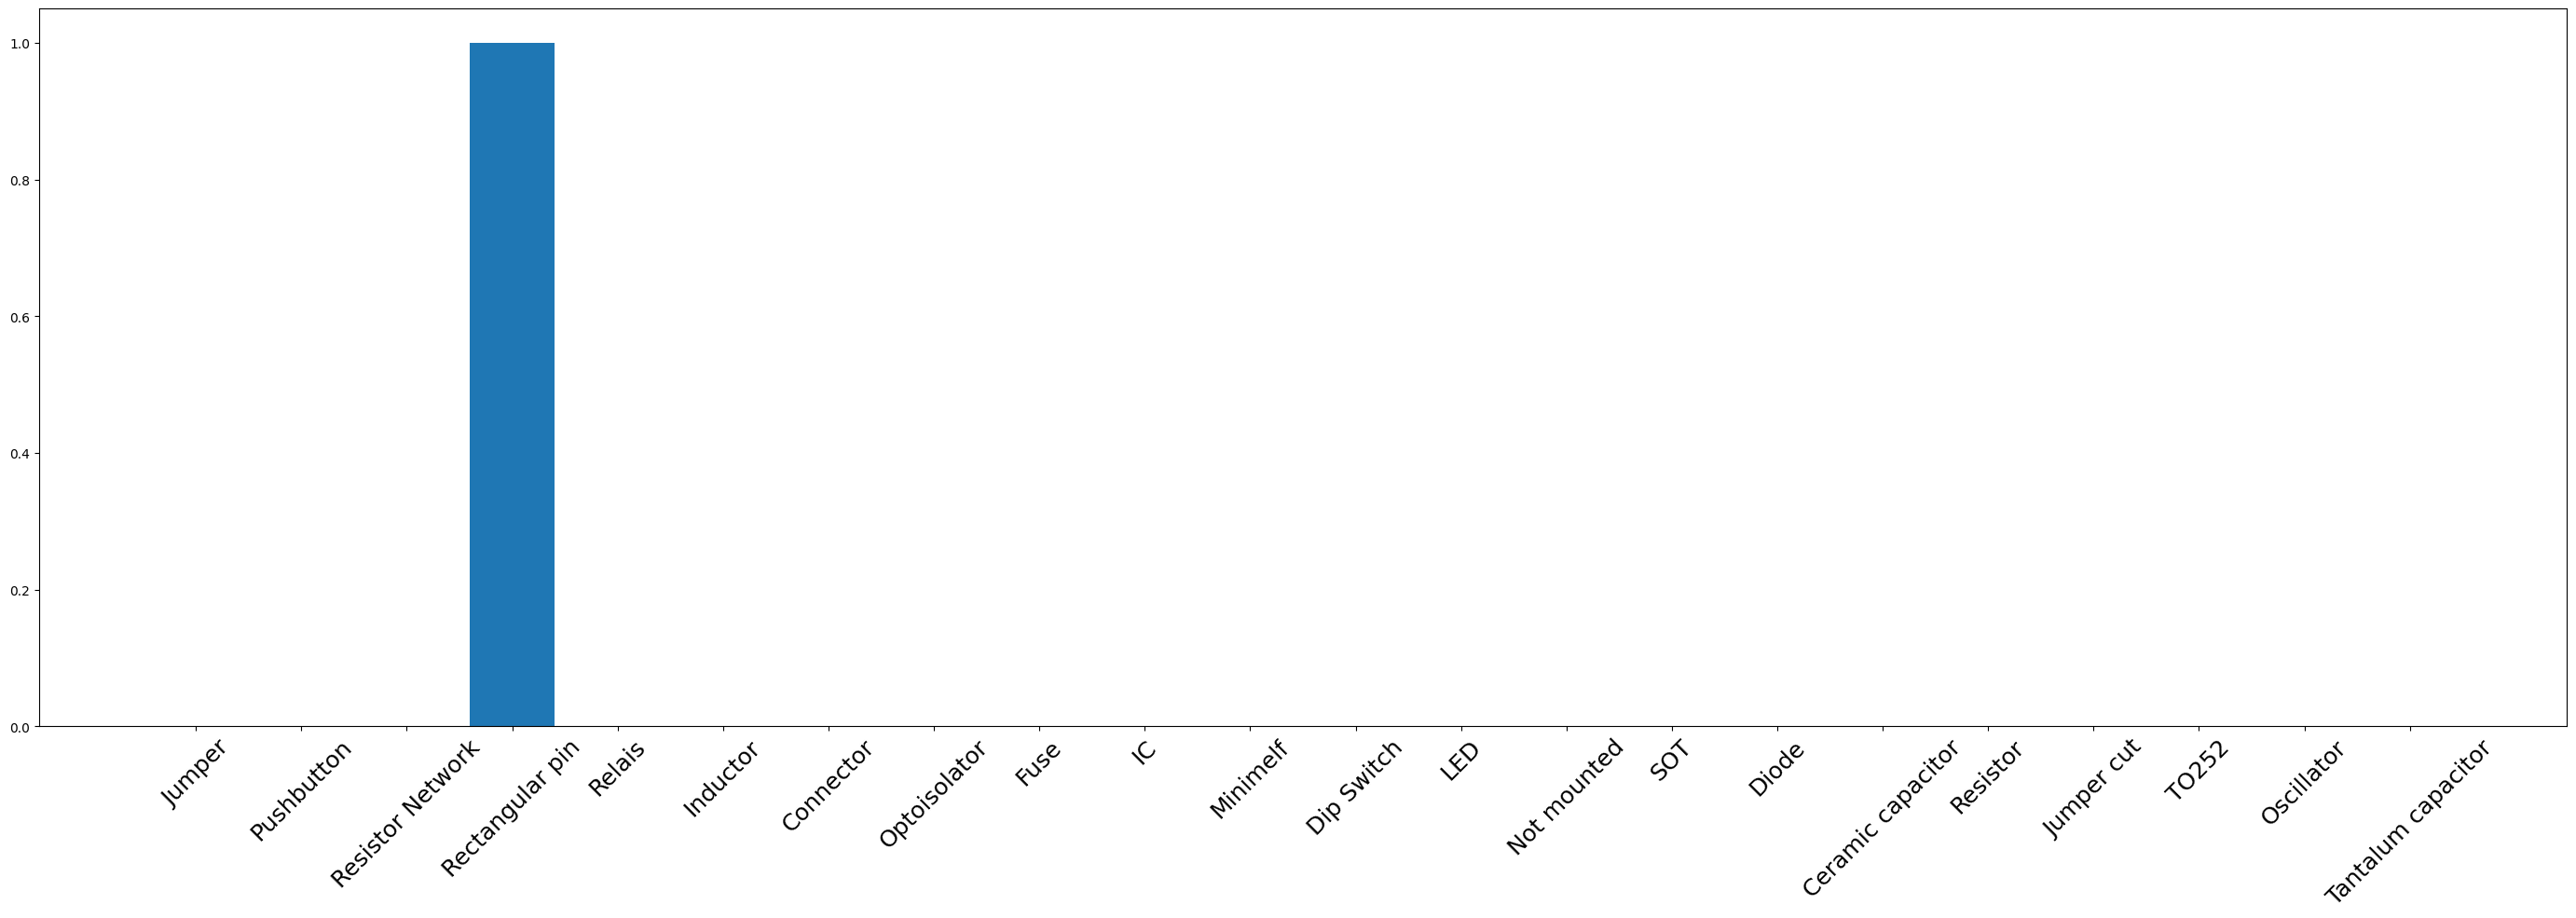

1/1 [==============================] - 0s 169ms/step
Predicted label: Resistor
Real label: Resistor


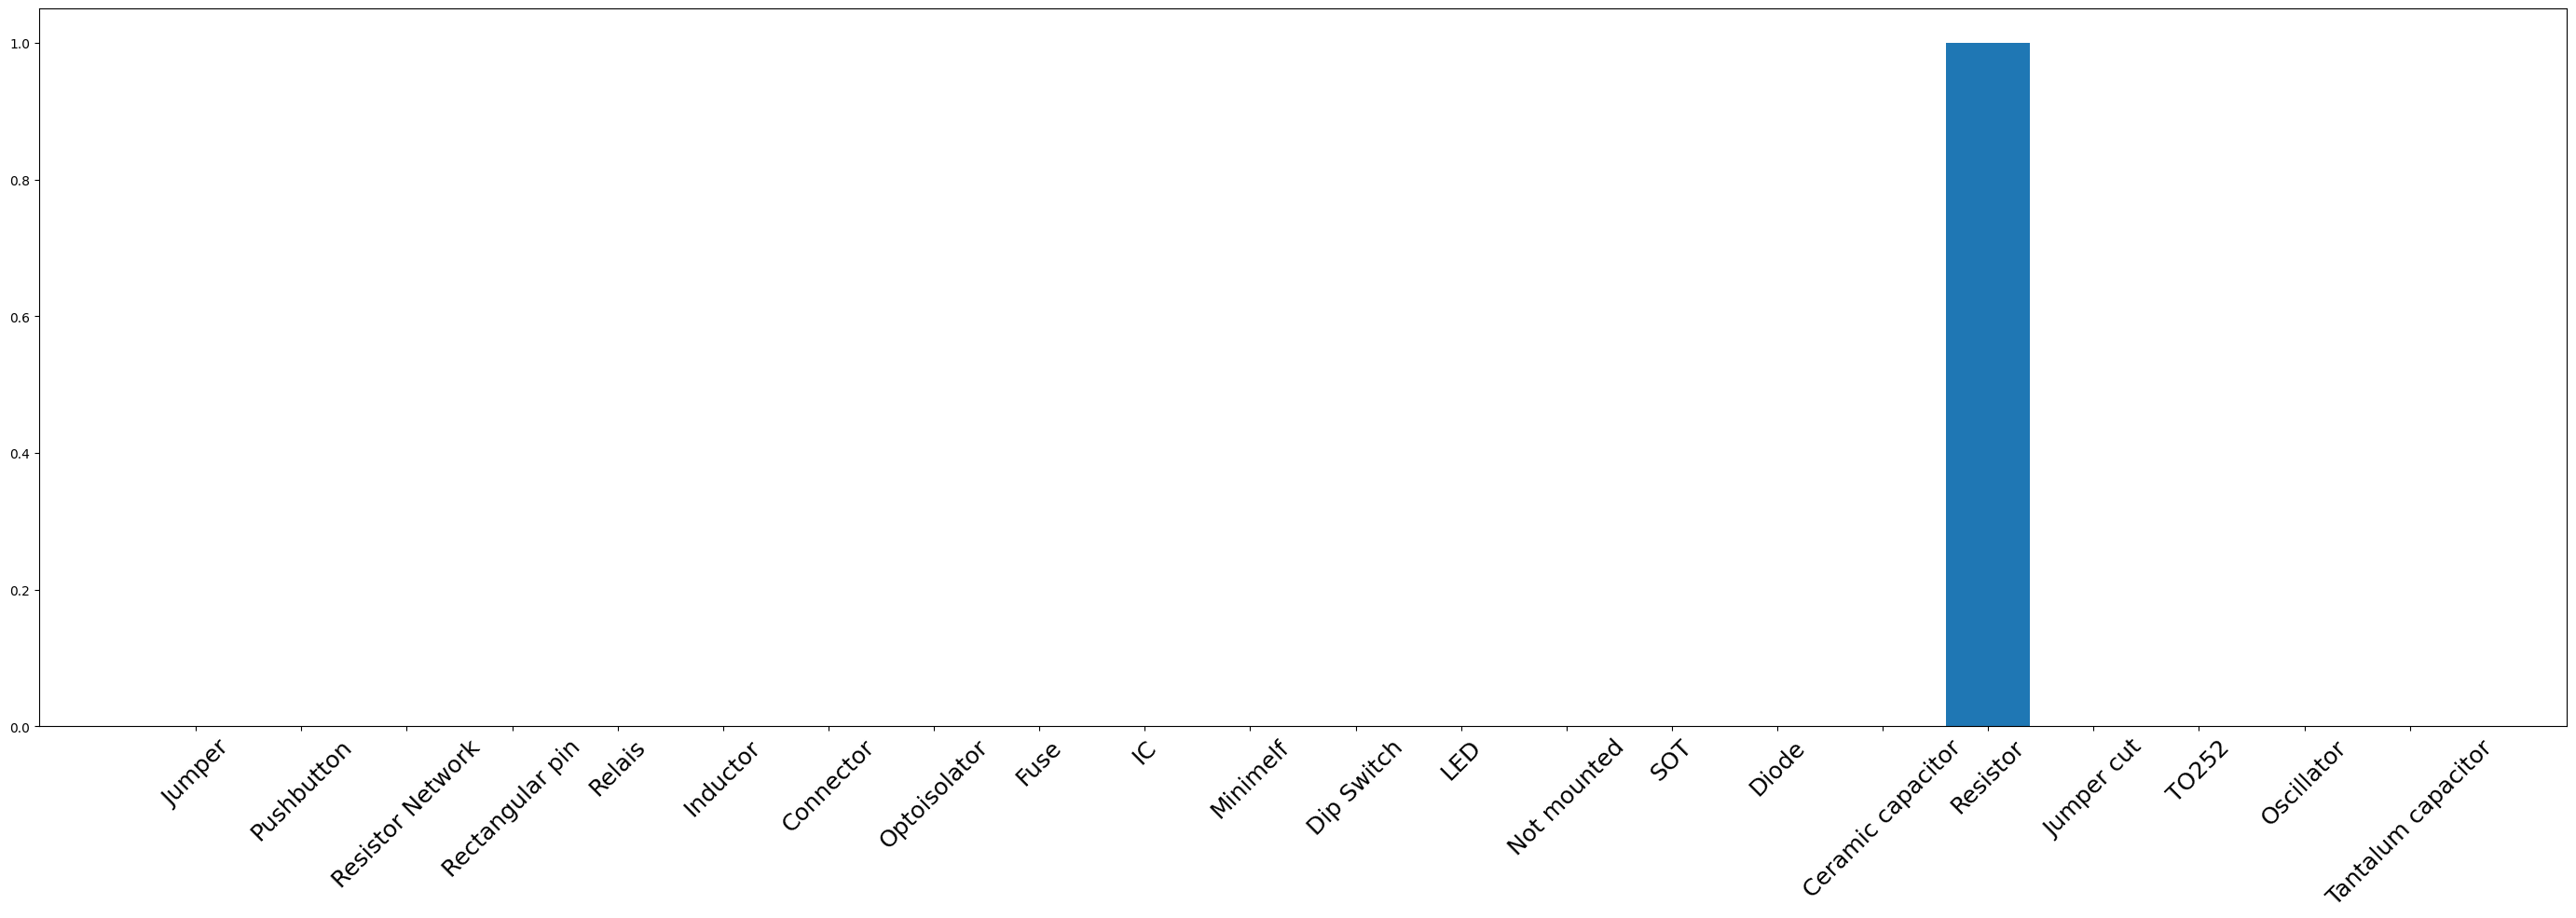

1/1 [==============================] - 0s 171ms/step
Predicted label: Ceramic capacitor
Real label: Ceramic capacitor


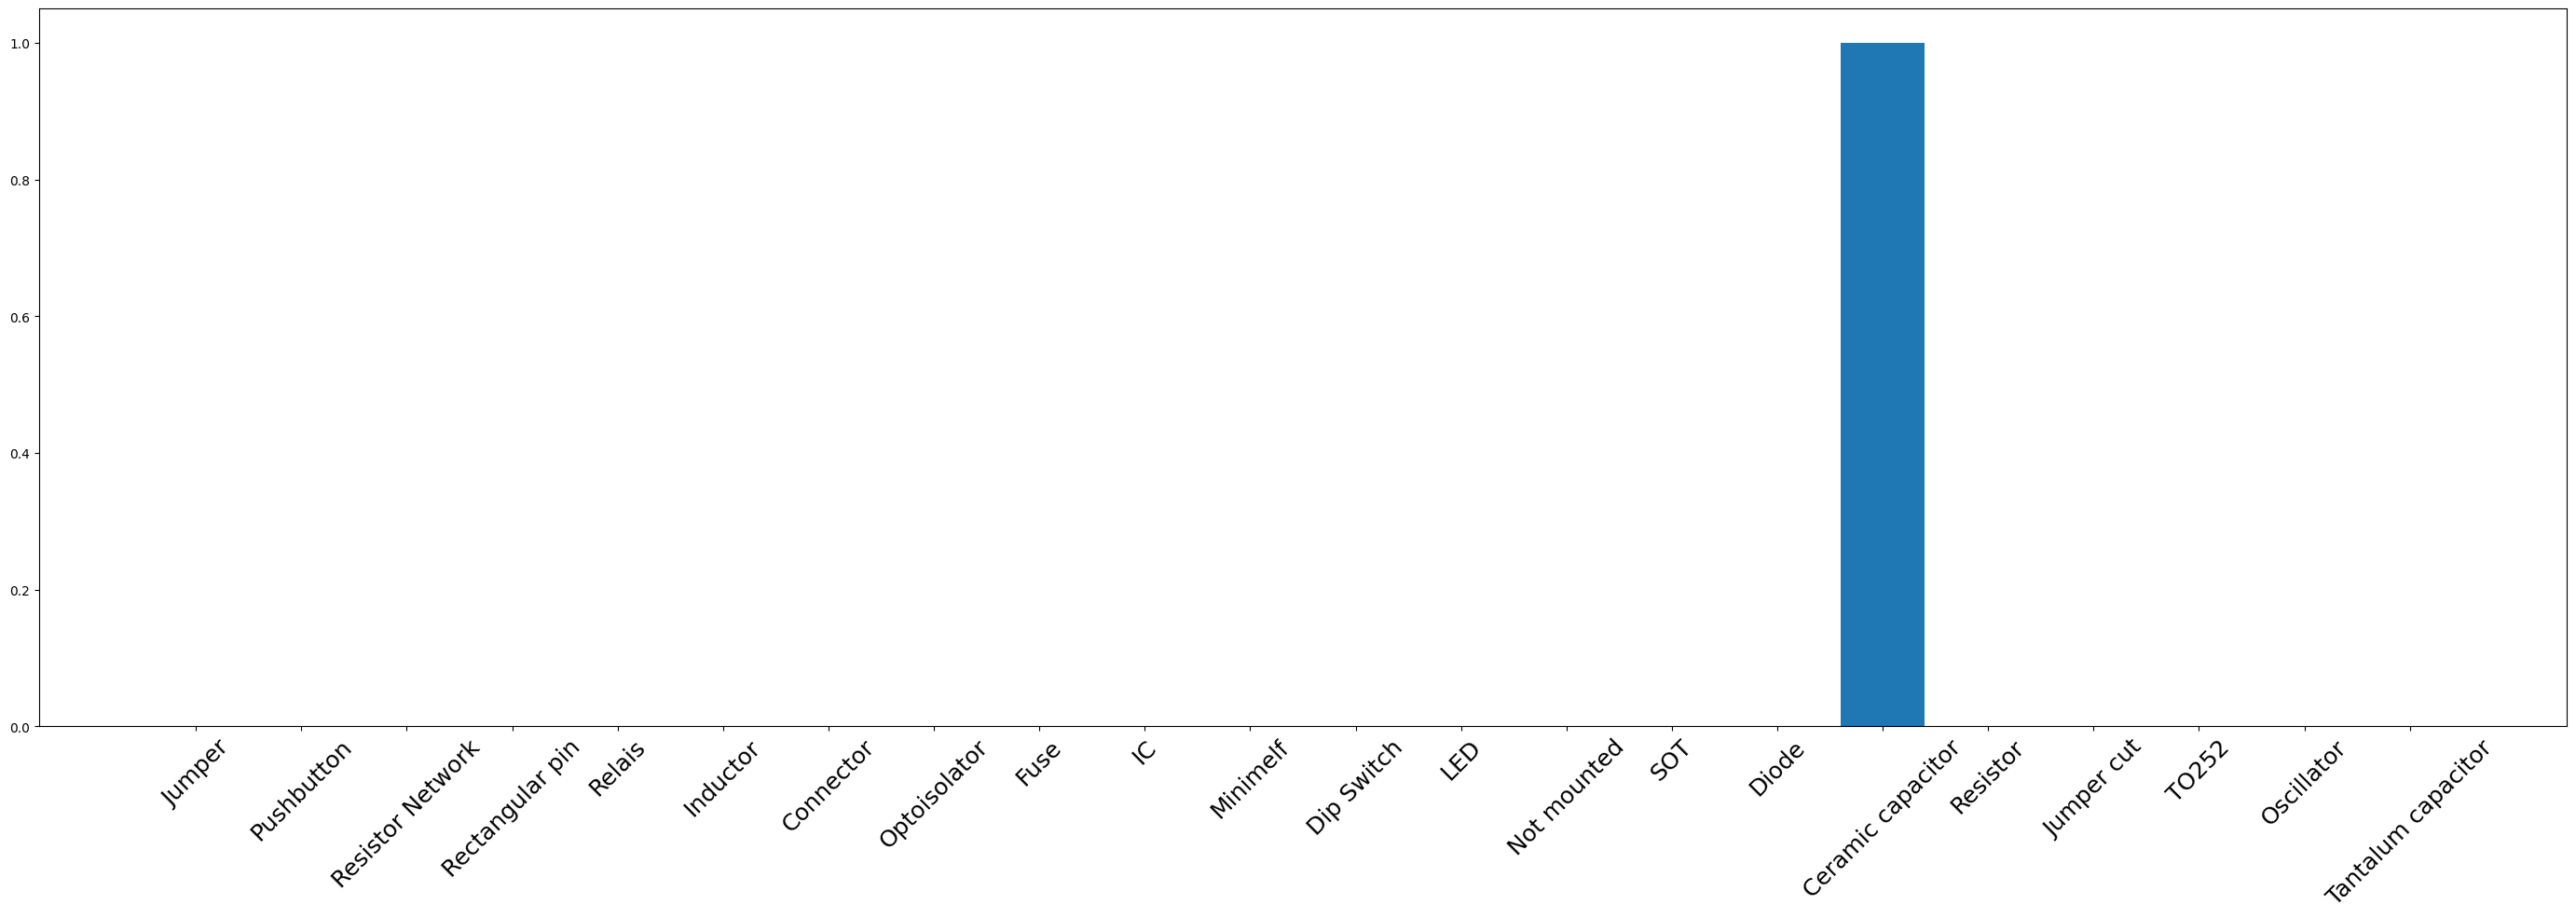




Score: 16 / 16 (100.0%)


In [76]:
import numpy as np
good = 0
extr = list(iter(validset))[np.random.randint(0, len(validset))]
img, lab = extr
for i in range(len(img)):
    im = tf.expand_dims(img['data'][i], axis=0)
    printable_object = dataset.print_item(img['print_object'][i])
    pred = model.predict(im)
    pred_lidx = tf.argmax(pred[0])
    pred_label = class_names[pred_lidx]
    print("Predicted label: {}".format(pred_label))
    act_lidx = tf.argmax(lab[i])
    act_label = class_names[act_lidx]
    print("Real label: {}".format(act_label))
    print()
    if pred_lidx == act_lidx:
        good += 1
    plt.figure(figsize=(60, 60))
    plt.imshow(printable_object)
    label = lab[i].numpy().decode("utf-8")
    plt.title(label, fontsize=60)
    plt.axis("off")
    plt.show()
    plt.figure(figsize=(35, 10))
    plt.bar(range(len(class_names)), pred[0], tick_label=class_names)
    plt.xticks(rotation=45, fontsize=18)
    plt.show()
print("\n\n")
print("Score:", good, "/", len(img), f"({(good/len(img))*100}%)")